#Author Information



Name: Kanishk Rana

PGID: 12410090

Course: MLSL1

#Preprocessing

 (Transforming to 0-1 range and splitting data into train:test in ration of 70:30)

##Overall Objective






We  have a dataset of handwritten letters, and we want to train a algorithm  to recognize them automatically.
Before we can  do that, we need to prepare the data in a way thats easier for algorithm + we need to ensure that we are not introducing any unwanted artefact

##Code

Null values in the dataset before preprocessing:
0
Example of unprocessed data:
labels    D
1         0
2         0
3         0
4         0
         ..
780       0
781       0
782       0
783       0
784       0
Name: 0, Length: 785, dtype: object


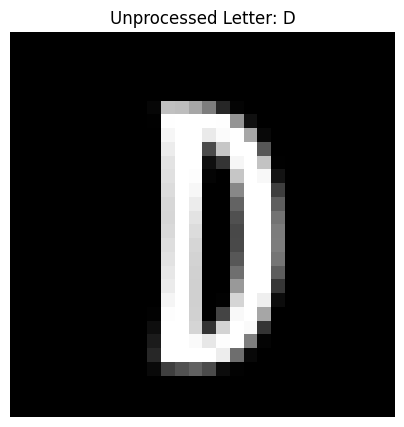

Example of processed data:
0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
780       0.0
781       0.0
782       0.0
783       0.0
labels    3.0
Name: 0, Length: 785, dtype: float64


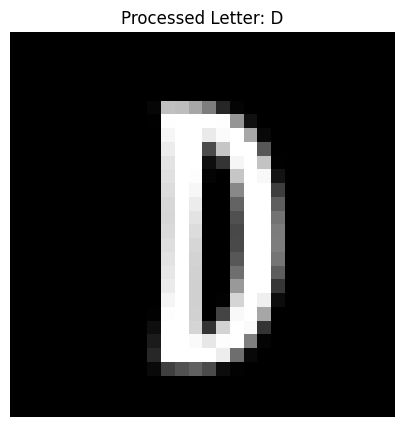

Null values in the dataset after preprocessing:
0


In [10]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def preprocess_tmnist(data):
    """
    Normalize pixel values to [0, 1] and split each class into train/test sets.
    Converts string labels to integer-encoded values for machine learning compatibility.
    """
    # Validate data
    if 'labels' not in data.columns:
        raise ValueError("Dataset must have a 'labels' column for class labels.")

    # Show one unprocessed row
    print("Example of unprocessed data:")
    print(data.iloc[0])

    # Visualize an example letter before preprocessing
    try:
        unprocessed_pixels = data.iloc[0, 1:].astype(float).values.reshape(28, 28)
        plt.figure(figsize=(5, 5))
        plt.imshow(unprocessed_pixels, cmap='gray')
        plt.title(f"Unprocessed Letter: {data.iloc[0, 0]}")
        plt.axis('off')
        plt.show()
    except Exception as e:
        print(f"Error in visualizing unprocessed data: {e}")

    # Separate features and labels
    features = data.iloc[:, 1:]
    labels = data.iloc[:, 0]

    # Convert features to float to avoid dtype incompatibility
    features = features.apply(pd.to_numeric, errors='coerce')

    # Check for NaNs and handle them
    if features.isnull().values.any():
        print("NaN values detected in features. Filling with 0.")
        features = features.fillna(0)

    # Normalize features to [0, 1]
    scaler = MinMaxScaler(feature_range=(0, 1))
    features_scaled = scaler.fit_transform(features)

    # Encode labels (strings to integers)
    label_encoder = LabelEncoder()
    labels_encoded = label_encoder.fit_transform(labels)

    # Recombine features and labels
    data_scaled = pd.DataFrame(features_scaled)
    data_scaled['labels'] = labels_encoded

    # Show one processed row
    print("Example of processed data:")
    print(data_scaled.iloc[0])

    # Visualize an example letter after preprocessing
    try:
        processed_pixels = data_scaled.iloc[0, :-1].values.reshape(28, 28)
        plt.figure(figsize=(5, 5))
        plt.imshow(processed_pixels, cmap='gray')
        plt.title(f"Processed Letter: {label_encoder.inverse_transform([data_scaled.iloc[0, -1]])[0]}")
        plt.axis('off')
        plt.show()
    except Exception as e:
        print(f"Error in visualizing processed data: {e}")

    # Split each class into train and test
    class_splits = {}
    for cls in data_scaled['labels'].unique():
        class_data = data_scaled[data_scaled['labels'] == cls]
        train_data, test_data = train_test_split(class_data, test_size=0.3, random_state=42)
        class_splits[cls] = {'train': train_data, 'test': test_data}

    return class_splits, label_encoder

# Load the dataset
file_path = '/content/tmnst Dataset.csv'
data = pd.read_csv(file_path)

# Check for nulls before preprocessing
print("Null values in the dataset before preprocessing:")
print(data.isnull().sum().sum())

# Preprocess the dataset
preprocessed_data, label_encoder = preprocess_tmnist(data)

# Check for nulls after preprocessing
print("Null values in the dataset after preprocessing:")
total_nulls = 0
for cls, splits in preprocessed_data.items():
    total_nulls += splits['train'].isnull().sum().sum()
    total_nulls += splits['test'].isnull().sum().sum()
print(total_nulls)

##Explanation of Code

### Checks Performed

To ensure the data is suitable for machine learning, the code performs the following checks:

1. **Label Check:**
   - Verifies the presence of labels in the dataset.
   - Specifically looks for a column named `'labels'` to associate each image with its corresponding letter (e.g., 'A', 'B', 'C').
   - **Action:** If the `'labels'` column is missing, the code throws an error.

2. **Missing Value Check:**
   - Uses pandas functions to identify any `NaN` (Not a Number) values in the dataset, which represent missing data.
   - **Action:** If any `NaN` values are found, they are replaced with 0.

3. **Pixel Value Range Check (Scaling):**
   - Ensures that pixel values are in a suitable range for machine learning algorithms.
   - **Action:** Utilizes `MinMaxScaler` to scale all pixel values, ensuring they fall within the range of 0 to 1 as required by the assignment.

---

### How Checks are Done

1. **Label Check:**
   - The code explicitly checks for the existence of a column named `'labels'`.
   - If the column is missing, it raises an error message to halt execution.

2. **Missing Value Check:**
   - The `pandas.isnull().sum()` function is used to count missing values in each column.
   - Any detected `NaN` values are replaced with 0 using the `fillna(0)` method.

3. **Scaling:**
   - The `MinMaxScaler` from `sklearn.preprocessing` is applied to adjust pixel values.
   - This ensures all values fall within the range of 0 to 1, enhancing the performance of machine learning models.

---

### Parameters and Their Meaning

- **`data`:** Represents the entire dataset of handwritten letters, including images and labels.
- **`file_path`:** The file location where the dataset is stored.
- **`test_size=0.3`:** Specifies the proportion of data reserved for testing the model. In this case:
  - 30% of the data is used for testing.
  - 70% of the data is used for training.
- **`random_state=42`:** Ensures reproducibility by controlling the randomness of data splitting.
  - Running the code multiple times produces consistent training and testing splits.

---

### Sanity Checks and Visualization

1. **Null Value Comparison:**
   - Compares the number of missing values in the original dataset with the post-processed dataset.
   - Ensures that the preprocessing steps have correctly handled missing values.

2. **Visualization of Letters:**
   - Displays a sample letter from the dataset before and after preprocessing.
   - **Purpose:** Confirms that preprocessing (e.g., scaling) has not introduced any unwanted artifacts into the data.

---

### Summary

The code is designed to ensure data integrity and proper preprocessing through:
- Rigorous checks for labels, missing values, and scaling.
- Sanity checks for null values and visual inspections of the dataset.
- Parameter configuration to enhance reproducibility and optimize the data split for model training and evaluation.


#Problem 1

## Overall Objective



The main goal for this part of the problem is to:

1. Reduce the dimensionality of a dataset using both PCA and Fisher Projection.
2. Visualize how these techniques project data points in a 3D space, making it easier to understand how they separate different classes.
3. Compare the effectiveness of PCA and Fisher Projection in separating classes within the dataset.

##Code

Fisher Projection Explained Variance Ratio: [0.47927614 0.33391876 0.18680511]
Total Variance Explained by Fisher Projections: 1.0


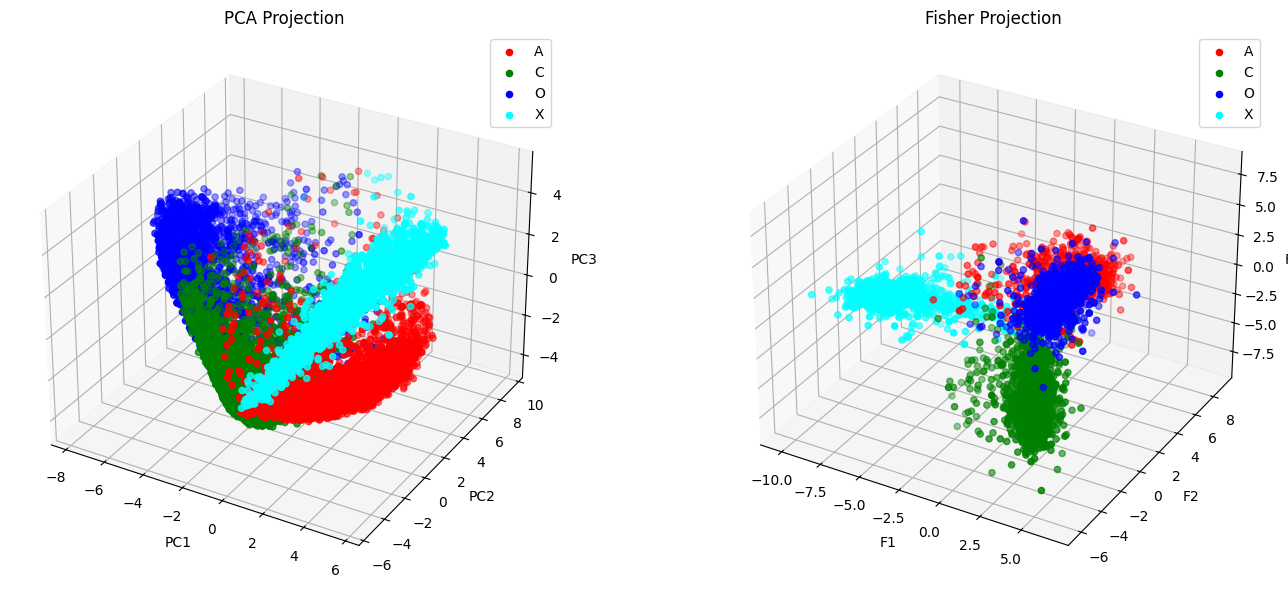

Fisher Projection Explained Variance Ratio: [0.44031098 0.31953387 0.24015515]
Total Variance Explained by Fisher Projections: 1.0


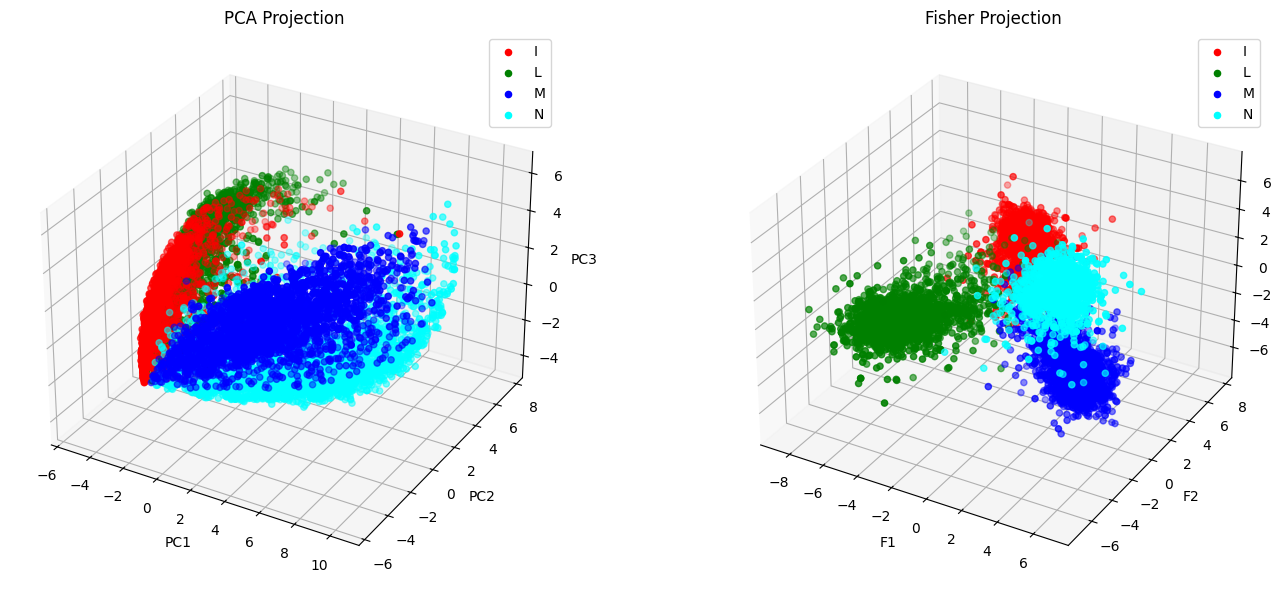

Fisher Projection Explained Variance Ratio: [0.43866172 0.39481936 0.16651892]
Total Variance Explained by Fisher Projections: 1.0


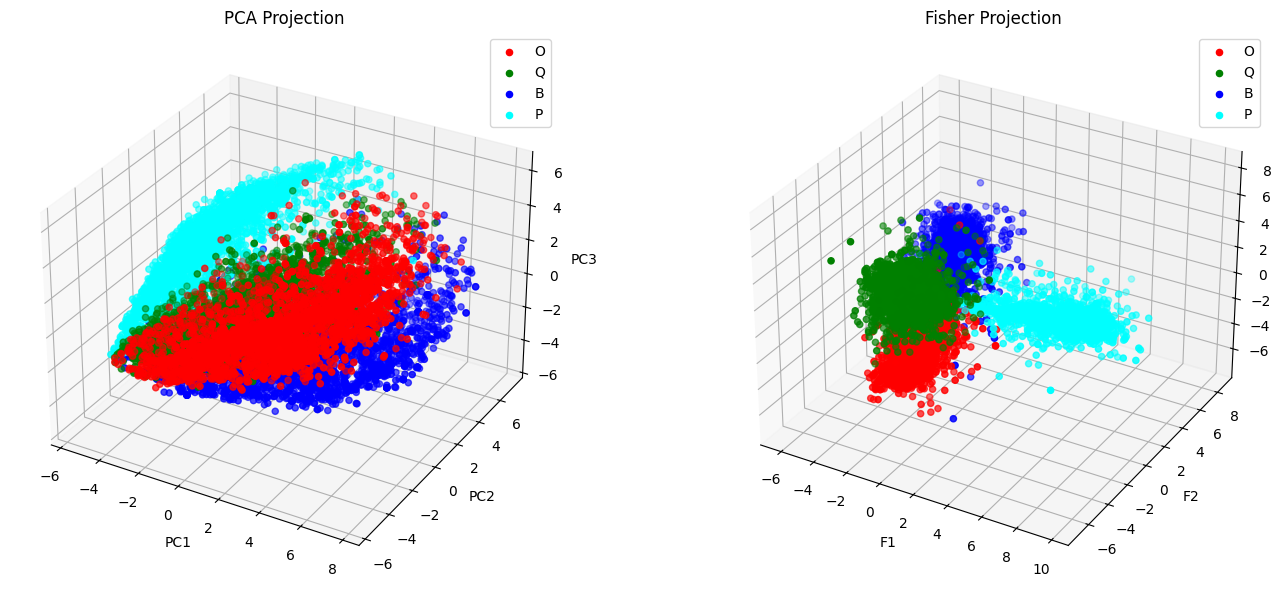

Fisher Projection Explained Variance Ratio: [0.41241038 0.3488187  0.23877092]
Total Variance Explained by Fisher Projections: 1.0


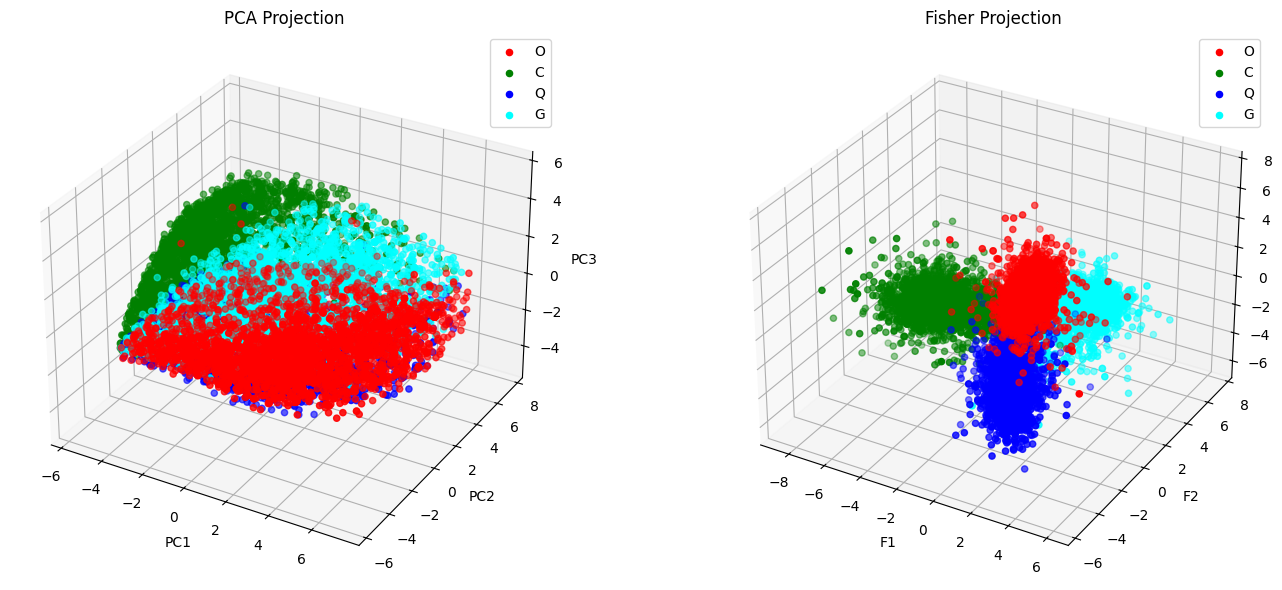

In [11]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def pca_vs_fisher_3d(data, selected_classes, label_encoder):
    """
    Compute PCA and Fisher projections and visualize in 3D.
    Arguments:
        data: Preprocessed data (dictionary with train/test splits for each class).
        selected_classes: List of original class labels to include in the projection.
        label_encoder: LabelEncoder used for encoding the labels.
    """
    # Encode the selected class labels into integers
    encoded_classes = label_encoder.transform(selected_classes)

    # Combine train data for the selected classes
    combined_data = pd.concat([pd.concat([data[cls]['train'], data[cls]['test']]) for cls in encoded_classes])
    features = combined_data.drop(columns=['labels']).values
    labels = combined_data['labels'].values

    # PCA Projection
    pca = PCA(n_components=3)
    pca_transformed = pca.fit_transform(features)  # Shape: (n_samples, 3)

    # Fisher Projection
    lda = LDA(n_components=3)
    fisher_transformed = lda.fit_transform(features, labels)  # Shape: (n_samples, 3)

    # Print Fisher projection variance ratios
    explained_variance = lda.explained_variance_ratio_
    print(f"Fisher Projection Explained Variance Ratio: {explained_variance}")
    print(f"Total Variance Explained by Fisher Projections: {explained_variance.sum()}")

    # Create 3D Scatter Plots
    fig = plt.figure(figsize=(15, 6))

    # PCA Scatter
    ax1 = fig.add_subplot(121, projection='3d')
    for cls, name, color in zip(encoded_classes, selected_classes, ['red', 'green', 'blue', 'cyan']):
        indices = (labels == cls)
        ax1.scatter(pca_transformed[indices, 0], pca_transformed[indices, 1],
                    pca_transformed[indices, 2], label=name, c=color)
    ax1.set_title('PCA Projection')
    ax1.set_xlabel('PC1')
    ax1.set_ylabel('PC2')
    ax1.set_zlabel('PC3')
    ax1.legend()

    # Fisher Scatter
    ax2 = fig.add_subplot(122, projection='3d')
    for cls, name, color in zip(encoded_classes, selected_classes, ['red', 'green', 'blue', 'cyan']):
        indices = (labels == cls)
        ax2.scatter(fisher_transformed[indices, 0], fisher_transformed[indices, 1],
                    fisher_transformed[indices, 2], label=name, c=color)
    ax2.set_title('Fisher Projection')
    ax2.set_xlabel('F1')
    ax2.set_ylabel('F2')
    ax2.set_zlabel('F3')
    ax2.legend()

    plt.tight_layout()
    plt.show()

pca_vs_fisher_3d(preprocessed_data, ['A', 'C', 'O', 'X'], label_encoder)
pca_vs_fisher_3d(preprocessed_data, ['I', 'L', 'M', 'N'], label_encoder)
pca_vs_fisher_3d(preprocessed_data, ['O', 'Q', 'B', 'P'], label_encoder)
pca_vs_fisher_3d(preprocessed_data, ['O', 'C', 'Q', 'G'], label_encoder)


##Explanation of Code



1. Visualizations

* The code generates two 3D scatter plots side-by-side using matplotlib:

 * PCA Projection (Left Plot): This plot shows how the data points are projected onto the first three principal components (PC1, PC2, PC3) calculated by PCA.
 * Fisher Projection (Right Plot): This plot shows the projection of the data points onto the three Fisher projection components (F1, F2, F3) calculated by LDA.
 * Each plot uses different colors to represent the selected classes ('A', 'C', 'O', 'X' in our case), allowing for visual assessment of how well the classes are separated by each technique.

2. Code Structure and Parameters

* pca_vs_fisher_3d(data, selected_classes, label_encoder) function:

 * data: This is a dictionary containing the preprocessed data. It is  structured with keys for each class (e.g., 'A', 'B', 'C', etc.), and within each class, further keys for 'train' and 'test' splits.
 * selected_classes: This is a list of class labels (e.g., ['A', 'C', 'O', 'X'])
 * label_encoder: This is a scikit-learn LabelEncoder object that has been used to encode the original class labels (which might be strings) into numerical values. This is necessary for LDA.

3. Code Execution:

* Encoding Class Labels: The label_encoder converts the selected_classes (like 'A', 'C', etc.) into numerical representations.
* Combining Data: The code extracts and combines the training and testing data for the selected classes into a single dataset (combined_data).
* Separating Features and Labels: The features (input variables) and labels (class assignments) are extracted from the combined_data.
* PCA Projection: A PCA object is created with n_components=3, meaning it will find the top 3 principal components. The fit_transform method is used to fit the PCA model to the features and then transform the data into the new PCA space.
* Fisher Projection: An LDA object is created with n_components=3 to find 3
Fisher projection components. The fit_transform method fits the LDA model to the features and labels and transforms the data into the Fisher projection space.
* Print Explained Variance: The code prints the explained variance ratios for the Fisher projection.
* Create 3D Plots: The code creates two subplots, one for PCA and one for Fisher projection. It iterates through the selected_classes and plots the data points for each class with a distinct color in both subplots.

Function Calls:
The pca_vs_fisher_3d function is called four times with different sets of selected_classes, allowing us to compare the projections for different combinations of classes.



#Problem 2

##Part 1 (computing Distance and Creating Matrix)

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def compute_fisher_distance_full(preprocessed_data, label_encoder):
    """
    Compute pairwise Fisher distances between all classes using the full dataset (train + test).
    Returns:
        fisher_distance_matrix: 2D array with Fisher distances between classes.
        fisher_distance_df: DataFrame with class pairs and their Fisher distances.
    """
    classes = list(preprocessed_data.keys())
    n_classes = len(classes)

    fisher_distances = []
    fisher_matrix = np.zeros((n_classes, n_classes))

    # Compute Fisher distance for each pair of classes
    for i in range(n_classes):
        print(f"\nConsidering Class {label_encoder.inverse_transform([classes[i]])[0]}...")
        class_i_data = pd.concat([preprocessed_data[classes[i]]['train'], preprocessed_data[classes[i]]['test']])
        print(f"Total Observations for Class {label_encoder.inverse_transform([classes[i]])[0]}: {class_i_data.shape[0]}")

        for j in range(i + 1, n_classes):
            # Combine train and test data for each class
            class_i = pd.concat([preprocessed_data[classes[i]]['train'], preprocessed_data[classes[i]]['test']]).drop(columns=['labels']).values
            class_j = pd.concat([preprocessed_data[classes[j]]['train'], preprocessed_data[classes[j]]['test']]).drop(columns=['labels']).values

            # Compute means and variances using axis=0
            mu_i = np.mean(class_i, axis=0)  # Feature-wise mean for class_i
            mu_j = np.mean(class_j, axis=0)  # Feature-wise mean for class_j
            var_i = np.var(class_i, axis=0)  # Feature-wise variance for class_i
            var_j = np.var(class_j, axis=0)  # Feature-wise variance for class_j

            # Debug: Print variance statistics
            print(f"Variance (first 5 features, Class {label_encoder.inverse_transform([classes[i]])[0]}): {var_i[:5]}")
            print(f"Variance (first 5 features, Class {label_encoder.inverse_transform([classes[j]])[0]}): {var_j[:5]}")

            # Handle zero variance by excluding problematic features
            valid_features = (var_i + var_j) > 1e-4  # Keep features with non-zero pooled variance
            if not valid_features.any():
                print("All features have zero variance. Skipping this pair of classes.")
                fisher_value = 0
            else:
                # Compute Fisher distance using only valid features
                fisher_value = np.sum(((mu_i - mu_j) ** 2)[valid_features] / (var_i + var_j)[valid_features])

            # Store the value
            fisher_distances.append({
                'Class 1': label_encoder.inverse_transform([classes[i]])[0],
                'Class 2': label_encoder.inverse_transform([classes[j]])[0],
                'Fisher Distance': fisher_value
            })
            fisher_matrix[i, j] = fisher_value
            fisher_matrix[j, i] = fisher_value  # Symmetry

    fisher_distance_df = pd.DataFrame(fisher_distances)
    fisher_distance_df.to_csv('fisher_distance_full.csv', index=False)
    print("\nFisher distances saved to 'fisher_distance_full.csv'.")

    print("Fisher Matrix is")
    print(fisher_matrix)

    print('Fisher Distance Table is ')
    print(fisher_distance_df.head(10))

    return fisher_matrix, fisher_distance_df


def find_top_similar_dissimilar_classes(fisher_distance_df, top_n=5):
    """
    Find the top N most similar and dissimilar classes based on Fisher distances.
    Args:
        fisher_distance_df: DataFrame containing Fisher distances (Class 1, Class 2, Fisher Distance).
        top_n: Number of most similar and dissimilar pairs to find.
    Returns:
        top_similar: DataFrame with top N most similar classes (smallest Fisher distances).
        top_dissimilar: DataFrame with top N most dissimilar classes (largest Fisher distances).
    """
    # Sort by Fisher Distance
    sorted_distances = fisher_distance_df.sort_values(by="Fisher Distance")

    # Top N most similar classes (smallest Fisher distances)
    top_similar = sorted_distances.head(top_n)

    # Top N most dissimilar classes (largest Fisher distances)
    top_dissimilar = sorted_distances.tail(top_n)

    return top_similar, top_dissimilar


# Example usage
print("\n--- Fisher Distance Computation Using Full Dataset ---")
fisher_matrix_full, fisher_distance_df_full = compute_fisher_distance_full(preprocessed_data, label_encoder)

# Find top similar and dissimilar classes
print("\n--- Finding Top Similar and Dissimilar Classes ---")
top_n = 10
top_similar, top_dissimilar = find_top_similar_dissimilar_classes(fisher_distance_df_full, top_n=top_n)

print(f"\nTop {top_n} Most Similar Classes:")
print(top_similar)

print(f"\nTop {top_n} Most Dissimilar Classes:")
print(top_dissimilar)



--- Fisher Distance Computation Using Full Dataset ---

Considering Class D...
Total Observations for Class D: 2874
Variance (first 5 features, Class D): [0. 0. 0. 0. 0.]
Variance (first 5 features, Class F): [0. 0. 0. 0. 0.]
Variance (first 5 features, Class D): [0. 0. 0. 0. 0.]
Variance (first 5 features, Class J): [0. 0. 0. 0. 0.]
Variance (first 5 features, Class D): [0. 0. 0. 0. 0.]
Variance (first 5 features, Class H): [0. 0. 0. 0. 0.]
Variance (first 5 features, Class D): [0. 0. 0. 0. 0.]
Variance (first 5 features, Class A): [0. 0. 0. 0. 0.]
Variance (first 5 features, Class D): [0. 0. 0. 0. 0.]
Variance (first 5 features, Class G): [0. 0. 0. 0. 0.]
Variance (first 5 features, Class D): [0. 0. 0. 0. 0.]
Variance (first 5 features, Class W): [0. 0. 0. 0. 0.]
Variance (first 5 features, Class D): [0. 0. 0. 0. 0.]
Variance (first 5 features, Class N): [0. 0. 0. 0. 0.]
Variance (first 5 features, Class D): [0. 0. 0. 0. 0.]
Variance (first 5 features, Class P): [0. 0. 0. 0. 0.]
Var

## Explanation of Code + Results




### Functions and Key Logic

#### 1. `compute_fisher_distance_full(preprocessed_data, label_encoder)`
This function computes pairwise Fisher distances for all classes using the entire dataset (training + testing).

##### **Steps:**
1. **Input Parameters:**
   - **`preprocessed_data`:** A dictionary containing training and testing data split by classes.
   - **`label_encoder`:** Encodes class labels into numeric representations and vice versa.

2. **Iterate Over Class Pairs:**
   - Combines the train and test datasets for each class.
   - Computes **mean (`mu`)** and **variance (`var`)** of features for both classes.

3. **Fisher Distance Formula:**
   
- For each valid feature (non-zero pooled variance), Fisher distance is calculated as:
  \[
  D_{\text{Fisher}} = \sum \frac{(\mu_i - \mu_j)^2}{\sigma_i^2 + \sigma_j^2}
  \]

#### Why?
- **Numerator** \((\mu_i - \mu_j)^2\):  
  Measures the squared difference in means, representing how far apart the classes are.
- **Denominator** \((\sigma_i^2 + \sigma_j^2)\):  
  Normalizes the difference by accounting for the variability within each class. This prevents inflated distances due to high variance.


4. **Handle Zero Variance:**
   - If all features have zero pooled variance (rare but possible), the Fisher distance for that pair is set to 0 to avoid division by zero.

5. **Store Results:**
   - Fisher distances are stored in a list and a symmetric matrix (`fisher_matrix`).
   - Saves the results as a CSV file (`fisher_distance_full.csv`).

6. **Output:**
   - **`fisher_matrix`:** A matrix of Fisher distances for all class pairs.
   - **`fisher_distance_df`:** A DataFrame containing class pairs and their Fisher distances.

---

#### 2. `find_top_similar_dissimilar_classes(fisher_distance_df, top_n=5)`
This function identifies the most similar and dissimilar class pairs based on Fisher distances.

##### **Steps:**
1. **Sort Distances:**
   - Sorts the Fisher distance DataFrame by the "Fisher Distance" column.

2. **Extract Top Similar Classes:**
   - Selects the top `N` rows with the smallest Fisher distances, representing the most similar class pairs.

3. **Extract Top Dissimilar Classes:**
   - Selects the top `N` rows with the largest Fisher distances, representing the most dissimilar class pairs.

4. **Output:**
   - **`top_similar`:** DataFrame with `N` most similar class pairs.
   - **`top_dissimilar`:** DataFrame with `N` most dissimilar class pairs.

---

### Observations from Sample Output

#### **Variance Analysis:**
- **Zero Variance:**
  - Many classes (e.g., Class `D` and others) have zero variance for some features.
  - This occurs when the feature values are constant across all observations for a class.
  - Zero variance features are excluded from the Fisher distance calculation.

#### **Top Similar Classes:**
- The smallest Fisher distances indicate class pairs with overlapping or very similar feature distributions.
  - Example: Classes `D` and `O` with a Fisher distance of `45.69`.

#### **Top Dissimilar Classes:**
- The largest Fisher distances indicate class pairs with well-separated distributions.
  - Example: Classes `H` and `I` with a Fisher distance of `619.18`.

---

### Formula and Implementation Rationale

1. **Fisher Distance Formula:**
   - Captures the trade-off between mean separation and variance overlap:
     - A large mean difference relative to variance implies strong separability.
     - High variance dilutes the separability as it indicates overlapping distributions.

2. **Symmetry of Fisher Matrix:**
   - The distance between Class `A` and `B` is the same as between Class `B` and `A`. Hence, the Fisher matrix is symmetric.

3. **Zero Variance Handling:**
   - Excluding features with zero pooled variance ensures mathematical validity and avoids division by zero.

4. **Normalization by Variance:**
   - Normalizing by the pooled variance ensures that feature scaling does not unfairly inflate or deflate the distances.

---

### Key Parameters

1. **`preprocessed_data`:** Provides train and test splits for all classes, ensuring comprehensive distance computation.
2. **`label_encoder`:** Decodes class labels to ensure results are interpretable.
3. **`top_n`:** Controls how many class pairs are highlighted as most similar or dissimilar.

---

### Practical Usage

1. **Analyzing Class Similarity:**
   - Fisher distances highlight class pairs that are difficult to distinguish (e.g., Classes `D` and `O`).

2. **Identifying Class Separability:**
   - Large Fisher distances indicate distinct class pairs, useful for validating model assumptions or feature engineering.

3. **Improving Feature Selection:**
   - Exclude features with consistently low Fisher distances across all class pairs as they contribute little to discrimination.

---

### Summary

- The code calculates Fisher distances to measure class separability based on feature distributions.
- Provides insights into class similarity and separability using both numerical and visual outputs.
- Handles practical challenges like zero variance features and outputs interpretable results through CSV files and sorted lists of top similar/dissimilar classes.


##Part 2 (Visualization)

##Code


--- Visualizing Distances with MDS and t-SNE ---


<ipython-input-13-69ca858a427a>:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab20', len(labels))(range(len(labels)))


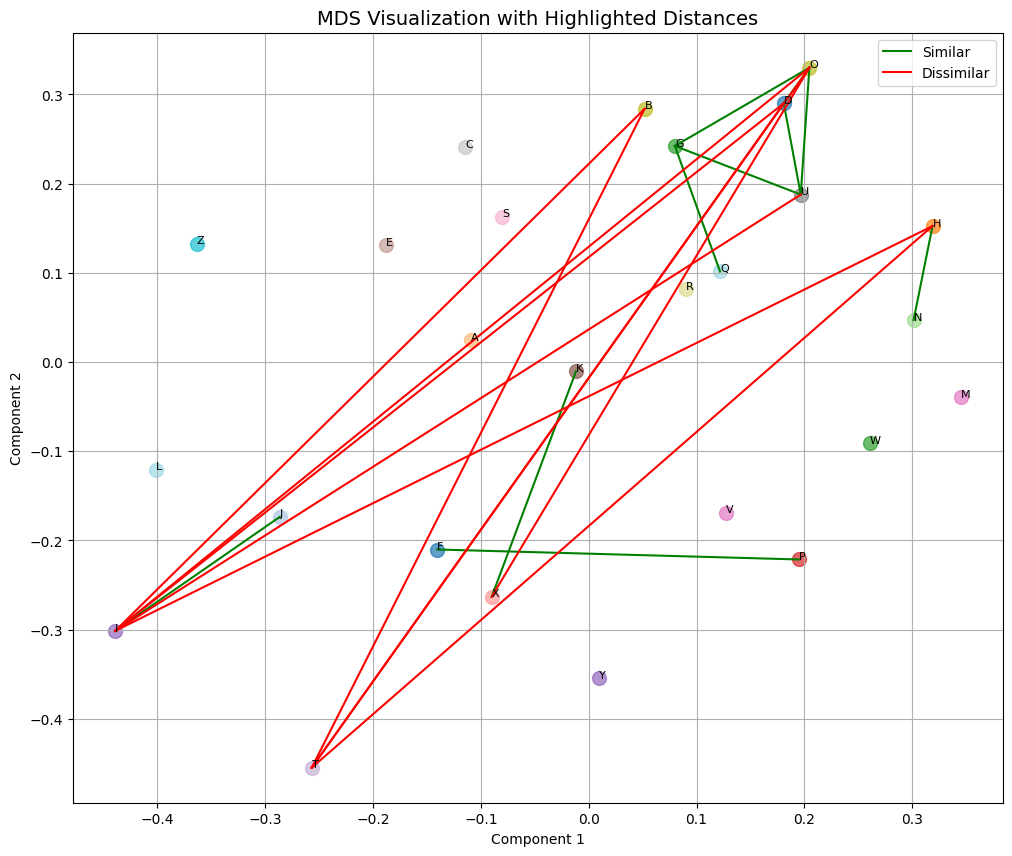

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
<ipython-input-13-69ca858a427a>:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab20', len(labels))(range(len(labels)))


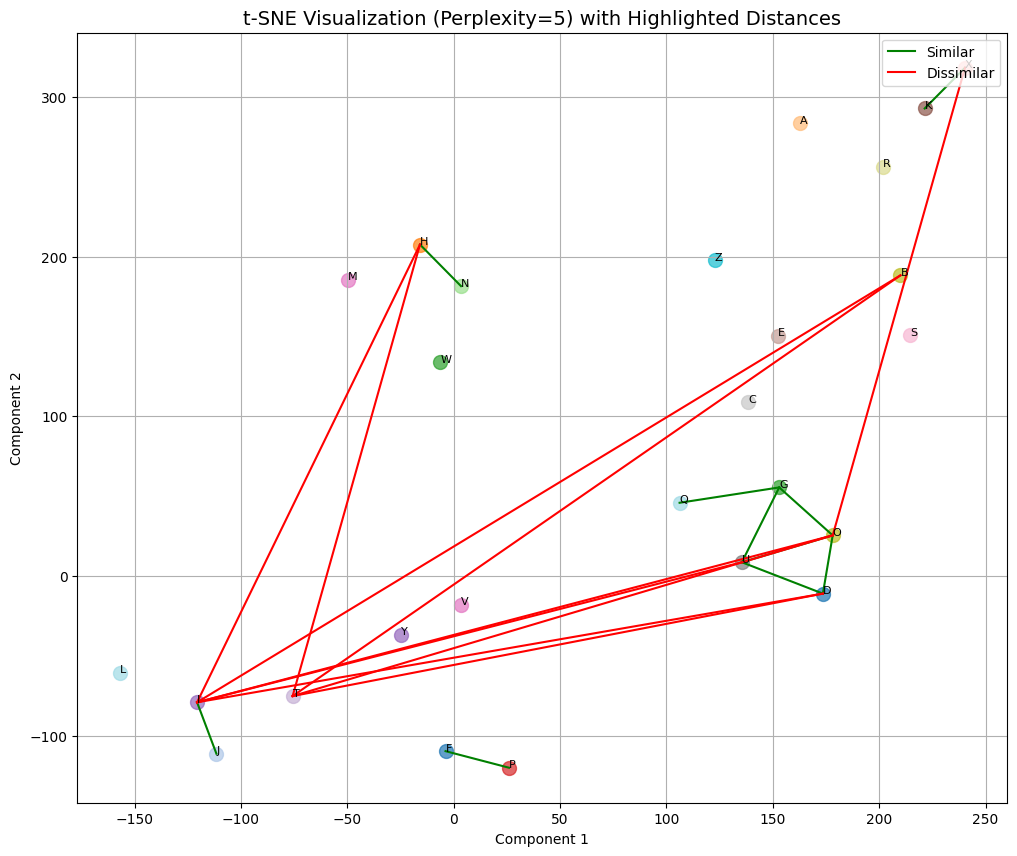

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
<ipython-input-13-69ca858a427a>:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab20', len(labels))(range(len(labels)))


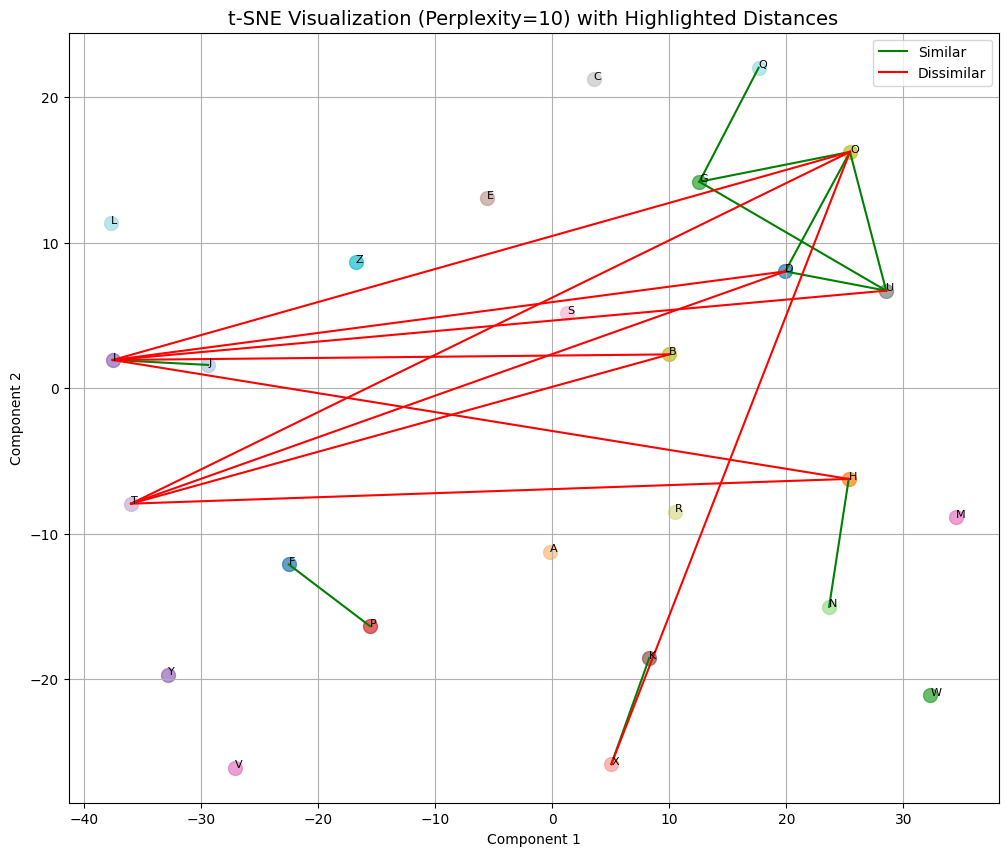

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
<ipython-input-13-69ca858a427a>:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab20', len(labels))(range(len(labels)))


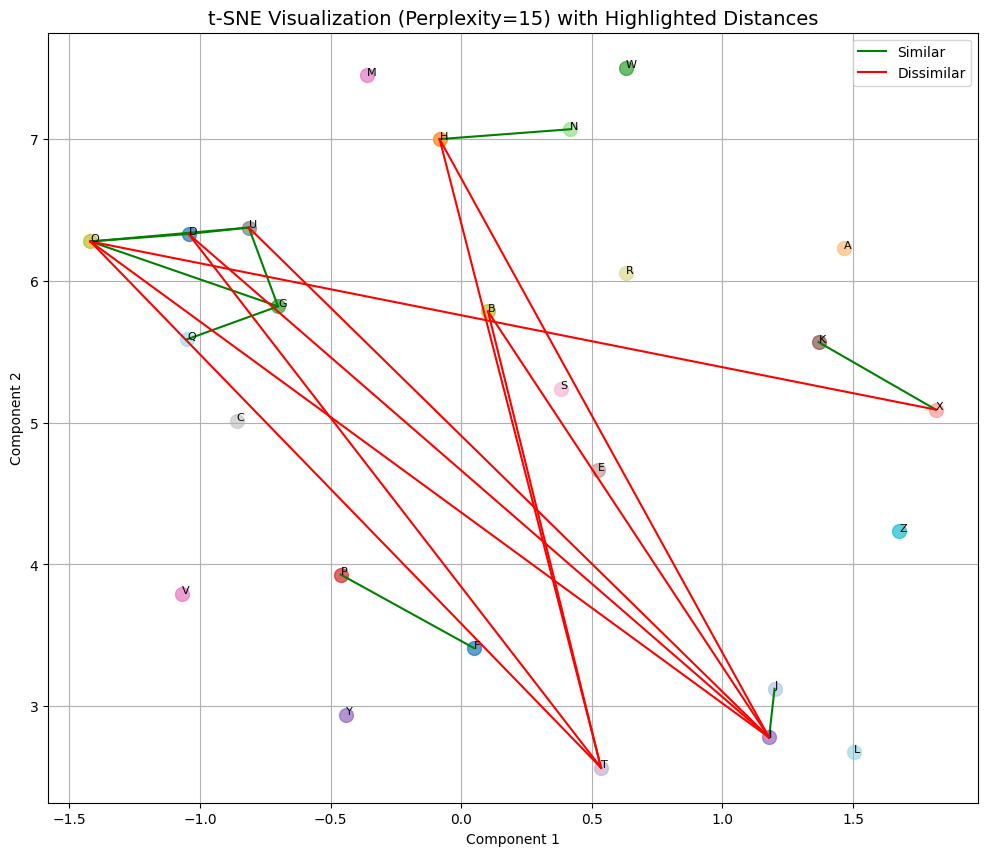

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
<ipython-input-13-69ca858a427a>:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab20', len(labels))(range(len(labels)))


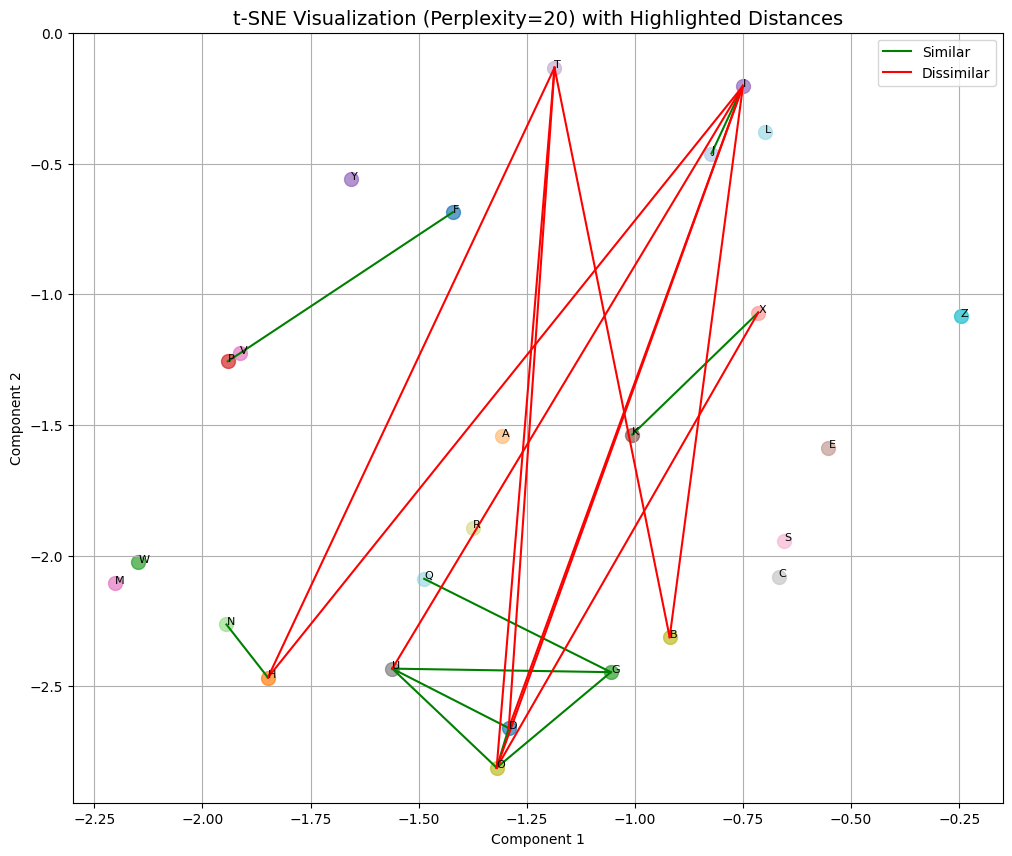

In [13]:
from sklearn.manifold import TSNE, MDS
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

# Validate Fisher Matrix
def validate_inputs(fisher_matrix, classes):
    if fisher_matrix.shape[0] != fisher_matrix.shape[1]:
        raise ValueError("Fisher matrix must be square.")
    if len(classes) != fisher_matrix.shape[0]:
        raise ValueError("Number of classes must match Fisher matrix dimensions.")
    if not np.allclose(fisher_matrix, fisher_matrix.T):
        raise ValueError("Fisher matrix must be symmetric.")

# Normalize the Fisher matrix
def normalize_matrix(matrix):
    return (matrix - np.min(matrix)) / (np.max(matrix) - np.min(matrix))

# Create embedding plot with similar and dissimilar pairs highlighted
def create_embedding_plot_with_distances(embedding, labels, top_similar, top_dissimilar, title):
    plt.figure(figsize=(12, 10))
    colors = cm.get_cmap('tab20', len(labels))(range(len(labels)))

    # Ensure labels is a list
    labels = list(labels)

    for i, label in enumerate(labels):
        plt.scatter(embedding[i, 0], embedding[i, 1], c=[colors[i]], s=100, alpha=0.7)
        plt.text(embedding[i, 0], embedding[i, 1], label, fontsize=8)

    # Highlight similar pairs
    for _, row in top_similar.iterrows():
        class1, class2 = row['Class 1'], row['Class 2']
        if class1 in labels and class2 in labels:
            i, j = labels.index(class1), labels.index(class2)
            plt.plot([embedding[i, 0], embedding[j, 0]], [embedding[i, 1], embedding[j, 1]], 'g-', label='Similar' if 'Similar' not in plt.gca().get_legend_handles_labels()[1] else "")

    # Highlight dissimilar pairs
    for _, row in top_dissimilar.iterrows():
        class1, class2 = row['Class 1'], row['Class 2']
        if class1 in labels and class2 in labels:
            i, j = labels.index(class1), labels.index(class2)
            plt.plot([embedding[i, 0], embedding[j, 0]], [embedding[i, 1], embedding[j, 1]], 'r-', label='Dissimilar' if 'Dissimilar' not in plt.gca().get_legend_handles_labels()[1] else "")

    plt.title(title, fontsize=14)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.legend(loc='upper right')
    plt.grid()
    plt.show()

# Visualize MDS with distances highlighted
def visualize_mds_with_distances(fisher_matrix, classes, top_similar, top_dissimilar, label_encoder):
    validate_inputs(fisher_matrix, classes)

    # Decode class names for human-readable labels
    decoded_classes = label_encoder.inverse_transform(classes)

    normalized_matrix = normalize_matrix(fisher_matrix)

    # Apply MDS
    mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
    embedding = mds.fit_transform(normalized_matrix)

    create_embedding_plot_with_distances(embedding, decoded_classes, top_similar, top_dissimilar, title="MDS Visualization with Highlighted Distances")


def visualize_tsne_with_distances_multiple(fisher_matrix, classes, top_similar, top_dissimilar, label_encoder, perplexities, n_iter=1000):
    """
    Visualize t-SNE embedding with highlighted distances for multiple perplexity values.
    """
    validate_inputs(fisher_matrix, classes)
    decoded_classes = label_encoder.inverse_transform(classes)
    normalized_matrix = normalize_matrix(fisher_matrix)

    num_classes = len(classes)
    valid_perplexities = [p for p in perplexities if p < num_classes]
    if not valid_perplexities:
        raise ValueError(f"All perplexity values must be less than the number of classes ({num_classes}).")

    for perplexity in valid_perplexities:
        tsne = TSNE(n_components=2, metric='precomputed', perplexity=perplexity,
                    n_iter=n_iter, random_state=42, init='random')
        embedding = tsne.fit_transform(normalized_matrix)

        create_embedding_plot_with_distances(
            embedding,
            decoded_classes,
            top_similar,
            top_dissimilar,
            title=f"t-SNE Visualization (Perplexity={perplexity}) with Highlighted Distances"
        )

# Example Usage (assuming you have fisher_matrix_full, preprocessed_data, label_encoder, etc.)
print("\n--- Visualizing Distances with MDS and t-SNE ---")
top_similar = fisher_distance_df_full.nsmallest(10, 'Fisher Distance')
top_dissimilar = fisher_distance_df_full.nlargest(10, 'Fisher Distance')

# Visualize MDS
visualize_mds_with_distances(fisher_matrix_full, list(preprocessed_data.keys()), top_similar, top_dissimilar, label_encoder)

# Visualize t-SNE with multiple perplexities
perplexities_to_test = [5, 10, 15, 20]
visualize_tsne_with_distances_multiple(
    fisher_matrix_full,
    list(preprocessed_data.keys()),
    top_similar,
    top_dissimilar,
    label_encoder,
    perplexities=perplexities_to_test,
    n_iter=1000
)


## Explanation of Code + Results



### **1. Input Validation (`validate_inputs`)**
- Ensures the Fisher matrix and classes are valid for visualization:
  - **Square Matrix Check:** The Fisher matrix must have equal rows and columns to represent pairwise distances.
  - **Class-Count Match:** The number of classes must match the dimensions of the Fisher matrix.
  - **Symmetry Check:** The Fisher matrix must be symmetric because the distance between `A` and `B` is the same as between `B` and `A`.

---

### **2. Normalization of Fisher Matrix (`normalize_matrix`)**
- **Purpose:** Scales the Fisher matrix values to a range of 0 to 1 for consistent distance comparisons.
- **Reason:** Normalization ensures that all values fit within a common scale, improving compatibility with embedding algorithms like MDS and t-SNE.

---

### **3. MDS Visualization (`visualize_mds_with_distances`)**
- **Steps:**
  1. Validate the inputs using `validate_inputs`.
  2. Normalize the Fisher matrix.
  3. Apply Multidimensional Scaling (MDS):
     - **MDS:** Projects high-dimensional pairwise distances into a 2D space while preserving the relative distances.
     - **`dissimilarity='precomputed'`:** Indicates that the input matrix contains precomputed distances.
  4. Generate the 2D embedding and create a plot highlighting:
     - **Top Similar Pairs (Green Lines):** Represent class pairs with the smallest Fisher distances.
     - **Top Dissimilar Pairs (Red Lines):** Represent class pairs with the largest Fisher distances.
  5. Display the scatter plot with labeled points and highlighted connections.

---

### **4. t-SNE Visualization (`visualize_tsne_with_distances_multiple`)**
- **Steps:**
  1. Validate and normalize the Fisher matrix.
  2. Iterate over the given perplexity values.
  3. For each perplexity:
     - Apply t-SNE to reduce the matrix to 2D:
       - **Perplexity:** Represents the expected number of neighbors for each point.
       - t-SNE optimizes the placement of points such that pairwise similarities in the 2D space reflect the high-dimensional distances.
     - Generate the plot with highlighted similar and dissimilar class pairs.

---

### **Key Parameters**

1. **Perplexity in t-SNE:**
   - Determines the "balance" between local and global structure in the data.
   - **Why must perplexity be less than the number of classes?**
     - t-SNE builds probability distributions of neighbors, which becomes unstable if the number of neighbors exceeds the total points.
     - A perplexity greater than the number of classes leads to inaccurate embeddings.

2. **Normalization:**
   - Ensures consistency in scaling, avoiding biased embeddings due to outlier distances.

3. **Highlighted Distances:**
   - Top Similar Classes:
     - Green lines represent class pairs with overlapping feature distributions (small Fisher distances).
   - Top Dissimilar Classes:
     - Red lines represent class pairs with distinct distributions (large Fisher distances).

---

## Graph Interpretation

### **MDS Visualization**
- **Purpose:** Preserves global distances across all classes.
- **Observation:**
  - Classes connected by **green lines** (e.g., D and O) are closer in the embedding space, indicating strong similarity.
  - Classes connected by **red lines** (e.g., H and I) are farther apart, showing distinct distributions.
- **Interpretation:**
  - MDS effectively captures global relationships between classes but may not highlight local clusters.

---

### **t-SNE Visualizations**
- **Purpose:** Focuses on preserving local relationships while optimizing for global structure.
- **Observations:**
  - **Perplexity 5:**
    - Clusters are tightly packed, emphasizing very local similarities.
    - The red and green lines clearly show nearby and distant relationships, respectively.
  - **Perplexity 10:**
    - Slightly larger neighborhoods are considered, leading to better global structure visibility while retaining local clusters.
  - **Perplexity 15+:**
    - Too high perplexity may result in cluttered embeddings as more neighbors are considered, diluting local patterns.

- **Interpretation:**
  - Smaller perplexities highlight tightly packed clusters and local relationships.
  - Larger perplexities emphasize broader structural patterns but risk losing granularity.

---

## Summary
- **MDS:** Focuses on preserving global distances, ideal for overall structural insights.
- **t-SNE:** Balances local and global structures based on perplexity, with smaller perplexities capturing local clusters and larger values revealing global patterns.
- **Highlighted Distances:**
  - Green lines (similar classes) identify overlapping distributions.
  - Red lines (dissimilar classes) highlight distinct class pairs.

As seen clearly two classes with small Fisher distance are close to each other
 and two classes with larger Fisher distance are far from each other



#Problem 3

##Overall Objective

The primary goal for this problem is to :
1. Project high-dimensional data: Take preprocessed data with potentially many features and project it onto a lower-dimensional space using Fisher Projection (LDA).
 1. Prepare data for classification: Create a transformed dataset suitable for training classifiers, where the data has been optimized for class separability.
Provide insights into the data: Print key information about the original and projected data, including dimensions and sample data points.

2. Optimize KNN: Find the best value for the hyperparameter 'K' (number of neighbors) in the KNN classifier to achieve the highest accuracy.
 1. Evaluate performance: Measure the accuracy of the KNN classifier with different K values on both training and test data.
 2. Visualize results: Plot the accuracy scores to understand how the K value affects the classifier's performance.

3. Find the optimal bandwidth: Determine the best value for the smoothing parameter 'sigma' (bandwidth) in the Parzen window classifier to achieve the highest accuracy.
 1. Evaluate performance: Measure the accuracy of the Parzen window classifier with different sigma values on both training and test data.
 2. Visualize results: Plot the accuracy scores to understand how the sigma value affects the classifier's performance.




##Code for Projecting Data

In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from scipy.stats import multivariate_normal
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

def fisher_projection_with_data(preprocessed_data, n_components=25):
    """
    Project train and test data into Fisher space and visualize data before and after projection.
    Arguments:
        preprocessed_data: Dictionary containing train and test data for each class.
        n_components: Number of Fisher dimensions.
    Returns:
        train_data, test_data (projected into Fisher space with labels).
    """
    # Combine all classes into single train and test sets
    train = pd.concat([preprocessed_data[cls]['train'] for cls in preprocessed_data])
    test = pd.concat([preprocessed_data[cls]['test'] for cls in preprocessed_data])

    # Print dimensions of preprocessed data
    print("Dimensions of preprocessed train data:", train.shape)
    print("Dimensions of preprocessed test data:", test.shape)

    # Visualize a sample row before projection
    print("Sample row before Fisher projection (train):")
    print(train.iloc[0])

    # Check for NaNs in train and test data
    if train.isnull().values.any() or test.isnull().values.any():
        print("Warning: NaN values detected in preprocessed data.")
        train.dropna(inplace=True)
        test.dropna(inplace=True)

    X_train, y_train = train.drop(columns=['labels']).values, train['labels'].values
    X_test, y_test = test.drop(columns=['labels']).values, test['labels'].values

    # Fisher projection using LDA
    lda = LDA(n_components=n_components)
    X_projected_train = lda.fit_transform(X_train, y_train)
    X_projected_test = lda.transform(X_test)

    # Combine projected features with labels
    projected_train = np.column_stack((X_projected_train, y_train))
    projected_test = np.column_stack((X_projected_test, y_test))

    # Print dimensions of Fisher-projected data
    print("Dimensions of Fisher-projected train data:", projected_train.shape)
    print("Dimensions of Fisher-projected test data:", projected_test.shape)

    # Visualize a sample row after projection
    print("Sample row after Fisher projection (train):")
    print(projected_train[0])

    return projected_train, projected_test


projected_train, projected_test = fisher_projection_with_data(preprocessed_data, n_components=25)

Dimensions of preprocessed train data: (52286, 785)
Dimensions of preprocessed test data: (22438, 785)
Sample row before Fisher projection (train):
0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
780       0.0
781       0.0
782       0.0
783       0.0
labels    3.0
Name: 43785, Length: 785, dtype: float64
Dimensions of Fisher-projected train data: (52286, 26)
Dimensions of Fisher-projected test data: (22438, 26)
Sample row after Fisher projection (train):
[-2.04953151e+00 -2.28172469e+00  1.49884887e-01  1.68446268e+00
 -1.33238700e+00 -2.08381657e+00  1.75951445e+00  1.69969389e+00
 -3.07806509e-01  3.07311001e-01  1.22305433e+00  8.91995128e-01
  1.12329693e+00  1.34678526e+00 -7.11675609e-02 -4.81264713e-01
  1.01584270e-03  1.05034331e+00  2.28678520e-01 -1.39742360e+00
 -2.75487676e-01  6.48106435e-01 -6.21647643e-01 -1.62230200e-01
 -9.81890591e-01  3.00000000e+00]


## Explanation of Code


### 1. Print Statements and Values

The code includes several informative print statements to monitor progress and inspect the data at various stages of the Fisher Projection process:

- **Dimensions (Before):**
  - Prints the shapes (number of rows and columns) of the original training and testing data before projection.
  - **Purpose:** Helps understand the size and structure of the dataset.

- **Sample Row (Before):**
  - Prints the first row (`train.iloc[0]`) of the training data to provide a glimpse of the data before applying Fisher Projection.
  - **Purpose:** Offers insights into the raw data format and feature values.

- **NaN Warning:**
  - Checks for missing values (NaNs) in the dataset and prints a warning if any are found.
  - Handles missing values by removing rows with NaNs.
  - **Purpose:** Ensures data cleanliness and avoids errors during the projection process.

- **Dimensions (After):**
  - Prints the shapes of the projected training and testing data after applying Fisher Projection.
  - **Purpose:** Highlights the reduction in dimensionality.

- **Sample Row (After):**
  - Prints the first row of the projected training data.
  - **Purpose:** Provides an example of how the data looks in the reduced-dimensional space.

---

### 2. Code Structure and Parameters

#### `fisher_projection_with_data(preprocessed_data, n_components=25)`
- **Purpose:** Applies Fisher Projection (Linear Discriminant Analysis) to reduce the dimensionality of the dataset while retaining the most discriminative features.

- **Parameters:**
  1. **`preprocessed_data`:**
     - A dictionary containing the preprocessed data.
     - Assumed structure:
       - Keys represent different classes.
       - Each class contains keys for `'train'` and `'test'` splits.
     - **Purpose:** Provides the input data split by classes and usage (training/testing).
  2. **`n_components`:**
     - The number of dimensions (components) to retain after Fisher Projection.
     - Default value is 25.
     - **Purpose:** Determines the dimensionality of the reduced feature space.

---

### Summary

This code is structured to:
- Inspect and validate the dataset before and after applying Fisher Projection.
- Ensure data integrity by handling missing values.
- Allow flexible dimensionality reduction through the `n_components` parameter.

The print statements provide clarity and transparency at key stages, aiding debugging and understanding of the Fisher Projection process.


##Code for KNN Sweep


Question 3: Part A - KNN Hyperparameter Sweep

Performing KNN Hyperparameter Sweep:

Evaluating K = 1
K = 1 | Train Accuracy: 1.0000 | Test Accuracy: 0.9483

Evaluating K = 3
K = 3 | Train Accuracy: 0.9699 | Test Accuracy: 0.9431

Evaluating K = 5
K = 5 | Train Accuracy: 0.9619 | Test Accuracy: 0.9427

Evaluating K = 7
K = 7 | Train Accuracy: 0.9569 | Test Accuracy: 0.9405

Evaluating K = 9
K = 9 | Train Accuracy: 0.9537 | Test Accuracy: 0.9393

Evaluating K = 11
K = 11 | Train Accuracy: 0.9516 | Test Accuracy: 0.9393

Evaluating K = 13
K = 13 | Train Accuracy: 0.9495 | Test Accuracy: 0.9377

Evaluating K = 15
K = 15 | Train Accuracy: 0.9480 | Test Accuracy: 0.9367

Evaluating K = 17
K = 17 | Train Accuracy: 0.9464 | Test Accuracy: 0.9359

KNN Results saved to knn.csv


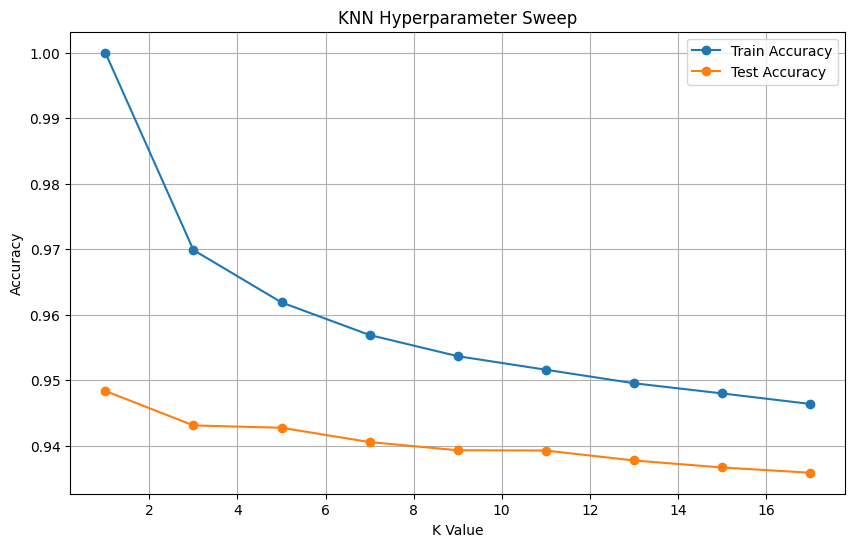


Final KNN Results:
   k-value  train-accuracy  test-accuracy
0        1        0.999981       0.948347
1        3        0.969858       0.943088
2        5        0.961864       0.942731
3        7        0.956891       0.940547
4        9        0.953659       0.939299
5       11        0.951593       0.939255
6       13        0.949528       0.937740
7       15        0.947978       0.936670
8       17        0.946372       0.935868


In [15]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Question 3: KNN and Parzen Window Classifiers Hyperparameter Sweeps
# Part A: KNN Sweep



# KNN Sweep Function
def knn_sweep(train, test, K=[1, 3, 5, 7, 9, 11, 13, 15, 17]):
    """
    Perform KNN hyperparameter sweep.
    Arguments:
        train: Train dataset (features + labels in last column).
        test: Test dataset (features + labels in last column).
        K: List of K values to test.
    Returns:
        knn_results: DataFrame with k-value, train accuracy, and test accuracy.
    """
    # Extract features and labels
    X_train, y_train = train[:, :-1], train[:, -1]
    X_test, y_test = test[:, :-1], test[:, -1]

    # Initialize a list to store results
    results = []

    # Iterate over K values
    print("\nPerforming KNN Hyperparameter Sweep:")
    for k in K:
        print(f"\nEvaluating K = {k}")

        # Initialize KNN classifier with current K
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)

        # Compute accuracies for train and test data
        train_acc = accuracy_score(y_train, knn.predict(X_train))
        test_acc = accuracy_score(y_test, knn.predict(X_test))

        # Print current accuracy values
        print(f"K = {k} | Train Accuracy: {train_acc:.4f} | Test Accuracy: {test_acc:.4f}")

        # Store results
        results.append({'k-value': k, 'train-accuracy': train_acc, 'test-accuracy': test_acc})

    # Convert results to a DataFrame
    knn_results = pd.DataFrame(results)

    # Save results to a CSV file
    knn_results.to_csv("knn.csv", index=False)
    print("\nKNN Results saved to knn.csv")

    # Plot train and test accuracies
    plt.figure(figsize=(10, 6))
    plt.plot(knn_results['k-value'], knn_results['train-accuracy'], label='Train Accuracy', marker='o')
    plt.plot(knn_results['k-value'], knn_results['test-accuracy'], label='Test Accuracy', marker='o')
    plt.title("KNN Hyperparameter Sweep")
    plt.xlabel("K Value")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid()
    plt.show()

    # Return the results for further use or validation
    return knn_results


# Part A Sub-question: Run KNN Sweep
# Perform KNN hyperparameter sweep on Fisher-projected data
print("\nQuestion 3: Part A - KNN Hyperparameter Sweep")
knn_results = knn_sweep(projected_train, projected_test, K=[1, 3, 5, 7, 9, 11, 13, 15, 17])

# Show the final results
print("\nFinal KNN Results:")
print(knn_results)


##Explanation of Code + Results



### 1. Functions and Code Execution

#### `knn_sweep(train, test, K=[1, 3, 5, 7, 9, 11, 13, 15, 17])`
- **Purpose:** Evaluates the KNN classifier over a range of `K` values to find the optimal number of neighbors.
- **Steps:**
  1. Takes the training data (`train`), test data (`test`), and a list of `K` values (`K`) as input.
  2. Separates features (`X`) and labels (`y`) for both training and test sets.
  3. Iterates through each `K` value in the list:
     - Initializes a KNN classifier with the current `K`.
     - Trains the KNN model on the training data.
     - Predicts labels for both training and test data.
     - Calculates and prints the accuracy scores for training and test sets.
  4. Stores the results (K value and accuracies) in a list.
  5. Converts the results list into a Pandas DataFrame.
  6. Saves the DataFrame to a CSV file named `"knn.csv"`.
  7. Plots the training and test accuracies against the `K` values.
- **Returns:** The results DataFrame.

---

### 2. Print Statements and Values
- **Purpose:** Provides progress updates and results during execution.
- **Includes:**
  - Indicating the start of the KNN sweep.
  - Showing the `K` value being evaluated in each iteration.
  - Displaying the training and test accuracies for each `K` value.
  - Confirming that the KNN results have been saved to `"knn.csv"`.

---

### 3. Why Increasing K Leads to Lower Accuracy
- **Key Observations:**
  - As `K` increases, both training and test accuracy generally decrease.
  
- **Reasons:**
  1. **Over-smoothing:**
     - Larger `K` values consider more neighbors when making predictions.
     - This smoothens the decision boundary, making the model less sensitive to local patterns in the data.
  2. **Bias Towards Dominant Classes:**
     - With larger `K`, data points surrounded by neighbors from a dominant class are more likely to be misclassified, even if they belong to a different class.
  3. **Optimal `K` Depends on the Data:**
     - The ideal `K` value depends on the dataset's complexity and the distribution of data points.
     - Smaller `K` values often perform better for datasets with complex or non-linear decision boundaries.

---

### 4. Summary
- The `knn_sweep` function is a useful tool for evaluating and tuning the KNN classifier.
- Print statements provide valuable insights into the process and results.
- Selecting the optimal `K` is crucial for balancing bias and variance, as larger `K` values can lead to over-smoothing and lower accuracy.


##Parzen Sweep


Question 3: Part B - Parzen Window Hyperparameter Sweep

Performing Parzen Window Hyperparameter Sweep:

Evaluating Sigma = 0.1
Sigma = 0.1 | Train Accuracy: 1.0000 | Test Accuracy: 0.9286

Evaluating Sigma = 0.5
Sigma = 0.5 | Train Accuracy: 1.0000 | Test Accuracy: 0.9308

Evaluating Sigma = 1
Sigma = 1 | Train Accuracy: 0.9995 | Test Accuracy: 0.9321

Evaluating Sigma = 1.5
Sigma = 1.5 | Train Accuracy: 0.9973 | Test Accuracy: 0.9304

Evaluating Sigma = 2
Sigma = 2 | Train Accuracy: 0.9925 | Test Accuracy: 0.9272

Evaluating Sigma = 3
Sigma = 3 | Train Accuracy: 0.9803 | Test Accuracy: 0.9201

Evaluating Sigma = 4
Sigma = 4 | Train Accuracy: 0.9637 | Test Accuracy: 0.9115

Evaluating Sigma = 6
Sigma = 6 | Train Accuracy: 0.9340 | Test Accuracy: 0.8999

Evaluating Sigma = 8
Sigma = 8 | Train Accuracy: 0.9162 | Test Accuracy: 0.8915

Evaluating Sigma = 10
Sigma = 10 | Train Accuracy: 0.9058 | Test Accuracy: 0.8865

Parzen Results saved to parzen.csv


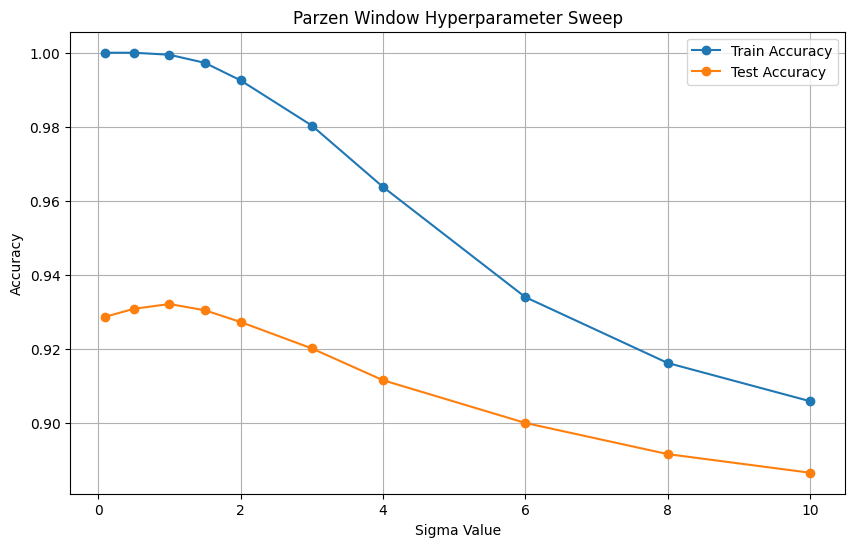


Final Parzen Results:
   sigma-value  train-accuracy  test-accuracy
0          0.1        1.000000       0.928648
1          0.5        1.000000       0.930787
2          1.0        0.999451       0.932080
3          1.5        0.997253       0.930386
4          2.0        0.992527       0.927222
5          3.0        0.980330       0.920091
6          4.0        0.963736       0.911489
7          6.0        0.933956       0.899947
8          8.0        0.916154       0.891523
9         10.0        0.905824       0.886487


In [16]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

# Question 3: KNN and Parzen Window Classifiers Hyperparameter Sweeps
# Part B: Parzen Window Sweep

# Function to sample a fixed number of data points per class
def sample_per_class(data, n_samples=200):
    """
    Sample a fixed number of data points per class from the dataset.
    Arguments:
        data: Dataset containing features and labels (last column is labels).
        n_samples: Number of samples per class.
    Returns:
        sampled_data: Dataframe with balanced classes.
    """
    sampled_data = []
    labels = np.unique(data[:, -1])
    for label in labels:
        class_data = data[data[:, -1] == label]
        sampled_data.append(class_data[:n_samples])
    return np.vstack(sampled_data)
def parzen_sweep(train, test, sigma=[0.1, 0.5, 1, 1.5, 2, 3, 4, 6, 8, 10]):
    """
    Perform Parzen window hyperparameter sweep.
    Arguments:
        train: Train dataset (features + labels in last column).
        test: Test dataset (features + labels in last column).
        sigma: List of sigma values to test.
    Returns:
        parzen_results: DataFrame with sigma-value, train accuracy, and test accuracy.
    """
    # Extract features and labels
    X_train, y_train = train[:, :-1], train[:, -1]
    X_test, y_test = test[:, :-1], test[:, -1]

    # Initialize a list to store results
    results = []

    print("\nPerforming Parzen Window Hyperparameter Sweep:")

    # Iterate over each sigma value
    for s in sigma:
        print(f"\nEvaluating Sigma = {s}")

        # Define the prediction function using Parzen Window
        def parzen_predict(X, X_train, y_train, sigma):
            unique_labels = np.unique(y_train)
            probs = []
            for label in unique_labels:
                # Get samples of the current class
                X_class = X_train[y_train == label]
                # Compute density for each sample
                density = np.sum([multivariate_normal(mean=mean, cov=np.eye(X.shape[1]) * sigma).pdf(X)
                                  for mean in X_class], axis=0)
                probs.append(density)
            # Return the label with the maximum probability
            return unique_labels[np.argmax(probs, axis=0)]

        # Predict for both train and test data
        y_train_pred = parzen_predict(X_train, X_train, y_train, s)
        y_test_pred = parzen_predict(X_test, X_train, y_train, s)

        # Compute accuracies
        train_acc = accuracy_score(y_train, y_train_pred)
        test_acc = accuracy_score(y_test, y_test_pred)

        # Print current accuracy values
        print(f"Sigma = {s} | Train Accuracy: {train_acc:.4f} | Test Accuracy: {test_acc:.4f}")

        # Store results
        results.append({'sigma-value': s, 'train-accuracy': train_acc, 'test-accuracy': test_acc})

    # Convert results to a DataFrame
    parzen_results = pd.DataFrame(results)

    # Save results to a CSV file
    parzen_results.to_csv("parzen.csv", index=False)
    print("\nParzen Results saved to parzen.csv")

    # Plot train and test accuracies
    plt.figure(figsize=(10, 6))
    plt.plot(parzen_results['sigma-value'], parzen_results['train-accuracy'], label='Train Accuracy', marker='o')
    plt.plot(parzen_results['sigma-value'], parzen_results['test-accuracy'], label='Test Accuracy', marker='o')
    plt.title("Parzen Window Hyperparameter Sweep")
    plt.xlabel("Sigma Value")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid()
    plt.show()

    # Return the results for further use or validation
    return parzen_results


# Subsample data for Parzen Sweep to reduce computation time
# Sample 350 points per class from the train data
n_samples_per_class = 350
sampled_train = sample_per_class(projected_train, n_samples=n_samples_per_class)

# Part B Sub-question: Run Parzen Sweep
print("\nQuestion 3: Part B - Parzen Window Hyperparameter Sweep")
parzen_results = parzen_sweep(sampled_train, projected_test, sigma=[0.1, 0.5, 1, 1.5, 2, 3, 4, 6, 8, 10])

# Show the final results
print("\nFinal Parzen Results:")
print(parzen_results)


## Explanation of Code



### 1. Function Definition and Use

#### `sample_per_class(data, n_samples=200)`
- **Purpose:**
  - Creates a balanced dataset by sampling a fixed number of data points per class.
- **Steps:**
  1. Takes a dataset (`data`) and the desired number of samples per class (`n_samples`, default 200) as input.
  2. Extracts unique class labels from the last column of the data.
  3. For each class, selects the first `n_samples` data points.
  4. Combines the sampled data from all classes into a new balanced dataset.
- **Returns:** The balanced dataset.

---

#### `parzen_sweep(train, test, sigma)`
- **Purpose:**
  - Evaluates the Parzen window classifier over a range of sigma (bandwidth) values.
- **Steps:**
  1. Takes the training data (`train`), test data (`test`), and a list of sigma values (`sigma`) as input.
  2. Separates features (`X`) and labels (`y`) for both training and test sets.
  3. Iterates through each sigma value (`s`) in the list:
     - **`parzen_predict(X, X_train, y_train, sigma):`**
       - A nested function that performs Parzen window classification.
       - For each class:
         - Calculates the probability density at each data point in `X` using a Gaussian kernel with the current `sigma`.
       - Assigns each data point to the class with the highest probability density.
     - Predicts labels for both training and test data using `parzen_predict`.
     - Calculates and prints the accuracy scores for training and test sets.
  4. Stores the results (sigma value and accuracies) in a list.
  5. Converts the results list into a Pandas DataFrame.
  6. Saves the DataFrame to a CSV file named `"parzen.csv"`.
  7. Plots the training and test accuracies against the sigma values.
- **Returns:** The results DataFrame.

---

### 2. Print Statements
- **Purpose:**
  - Indicate the start of the Parzen window sweep.
  - Show the sigma value being evaluated in each iteration.
  - Display the training and test accuracies for each sigma value.
  - Confirm that the Parzen results have been saved to `"parzen.csv"`.

---

### 3. Subsampling for Efficiency
- **Purpose:**
  - Reduce computation time for the Parzen window classifier, which can be computationally expensive for large datasets.
- **Method:**
  - The `sample_per_class` function is used to sample a fixed number of data points per class from the training data before calling `parzen_sweep`.

---

### 4. Key Concepts in Parzen Window Classification

#### Non-parametric Approach
- Parzen window does not make strong assumptions about the underlying data distribution.
- It estimates the density directly from the training data.

#### Kernel Density Estimation (KDE)
- Uses a kernel function (Gaussian in this case) to estimate the probability density at each point.

#### Bandwidth (Sigma)
- The `sigma` parameter controls the width of the kernel:
  - A small `sigma` creates spiky density estimates.
  - A large `sigma` creates smoother estimates.

#### Hyperparameter Tuning
- The `parzen_sweep` function helps find the optimal `sigma` value:
  - Balances bias and variance to achieve the best classification accuracy.

---

### 5. Behavior of Sigma (Bandwidth)
- **Small Sigma:**
  - Leads to overfitting.
  - Model performs well on training data but poorly on test data.
- **Increasing Sigma:**
  - Initially improves test accuracy as the model generalizes better.
- **Large Sigma:**
  - Causes over-smoothing.
  - Model loses its ability to discriminate between classes, resulting in a drop in both training and test accuracy.

---

### Summary
The Parzen window classifier is highly sensitive to the `sigma` parameter. Proper tuning of this hyperparameter is critical to achieving optimal performance, balancing overfitting and over-smoothing.


#Problem 4

##Overall Objective



In this problem the overall objective is to

1. Implement a perceptron
 * Build a basic perceptron classifier from scratch.
 * Train and evaluate: Train the perceptron on training data and evaluate its accuracy on both training and test data.
 * Analyze performance: Run the perceptron multiple times and visualize the distribution of accuracy scores to understand its consistency.


2. Implement logistic regression
 * Build a basic logistic regression classifier from scratch.
 * Train and evaluate: Train the model on training data and evaluate its accuracy on both training and test data.
 * Analyze performance: Run the logistic regression multiple times and visualize the distribution of accuracy scores to understand its consistency.

Compare perceptron with logistic regression

## Code for Perceptron

Question 4: Perceptron vs Logistic Regression

Running Perceptron Model...

Running Perceptron Model:
Run 001: Train Accuracy = 0.9933, Test Accuracy = 0.9902
Run 002: Train Accuracy = 0.9915, Test Accuracy = 0.9849
Run 003: Train Accuracy = 0.9913, Test Accuracy = 0.9878
Run 004: Train Accuracy = 0.9910, Test Accuracy = 0.9867
Run 005: Train Accuracy = 0.9896, Test Accuracy = 0.9884
Run 006: Train Accuracy = 0.9908, Test Accuracy = 0.9896
Run 007: Train Accuracy = 0.9925, Test Accuracy = 0.9902
Run 008: Train Accuracy = 0.9896, Test Accuracy = 0.9867
Run 009: Train Accuracy = 0.9913, Test Accuracy = 0.9896
Run 010: Train Accuracy = 0.9918, Test Accuracy = 0.9878
Run 011: Train Accuracy = 0.9915, Test Accuracy = 0.9878
Run 012: Train Accuracy = 0.9940, Test Accuracy = 0.9907
Run 013: Train Accuracy = 0.9901, Test Accuracy = 0.9855
Run 014: Train Accuracy = 0.9906, Test Accuracy = 0.9873
Run 015: Train Accuracy = 0.9940, Test Accuracy = 0.9902
Run 016: Train Accuracy = 0.9930, Test Accu

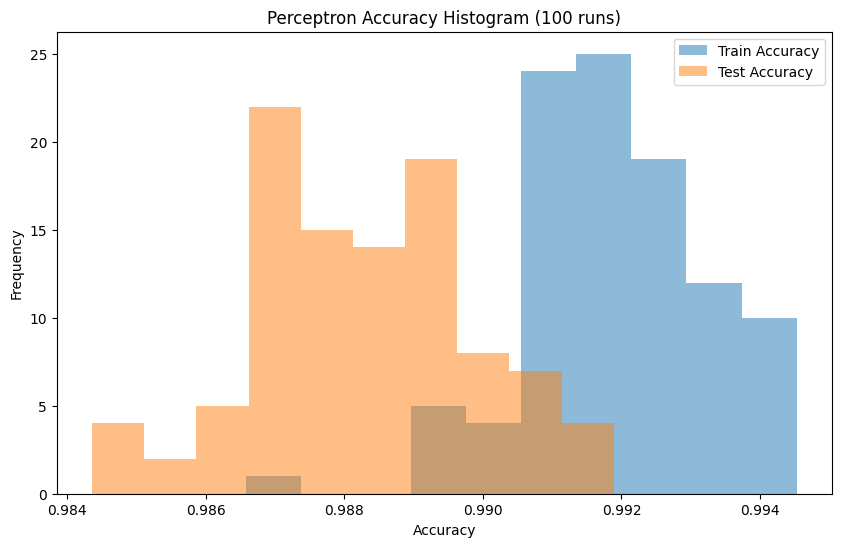

Perceptron Average Train Accuracy: 0.9919
Perceptron Average Test Accuracy: 0.9883


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Basic Perceptron Implementation
def perceptron_basic(X, y, learning_rate=0.1, n_iterations=100):
    """
    Basic implementation of Perceptron.
    """
    # Add a bias term (intercept) to the features
    X = np.c_[np.ones(X.shape[0]), X]

    # Initialize weights randomly
    weights = np.random.rand(X.shape[1])

    for _ in range(n_iterations):
        for i in range(len(X)):
            # Calculate linear combination of features and weights
            z = np.dot(X[i], weights)

            # Apply step activation function
            prediction = 1 if z >= 0 else 0

            # Update weights
            error = y[i] - prediction
            weights += learning_rate * error * X[i]

    return weights


def predict_perceptron_basic(X, weights):
    """Predict class labels using the trained weights."""
    X = np.c_[np.ones(X.shape[0]), X]  # Add bias term
    z = np.dot(X, weights)
    return (z >= 0).astype(int)  # Step activation


def perceptron_model(train_data, test_data, classes=['A', 'C'], n_iterations=100):
    """
    Train multiple Perceptron models and generate accuracy histograms.
    """
    X_train, y_train = train_data[:, :-1], train_data[:, -1]
    X_test, y_test = test_data[:, :-1], test_data[:, -1]

    # Select data for the specified classes
    selected_indices_train = np.isin(y_train, label_encoder.transform(classes))
    selected_indices_test = np.isin(y_test, label_encoder.transform(classes))
    X_train_selected = X_train[selected_indices_train]
    y_train_selected = y_train[selected_indices_train]
    X_test_selected = X_test[selected_indices_test]
    y_test_selected = y_test[selected_indices_test]

    # Ensure binary labels (0 and 1)
    y_train_selected = (y_train_selected == label_encoder.transform(classes)[0]).astype(int)
    y_test_selected = (y_test_selected == label_encoder.transform(classes)[0]).astype(int)

    results = []
    print("\nRunning Perceptron Model:")
    for i in range(n_iterations):
        # Train the Perceptron model
        weights = perceptron_basic(X_train_selected, y_train_selected, learning_rate=0.1, n_iterations=100)

        # Compute accuracies
        train_acc = accuracy_score(y_train_selected, predict_perceptron_basic(X_train_selected, weights))
        test_acc = accuracy_score(y_test_selected, predict_perceptron_basic(X_test_selected, weights))

        # Print current run details
        print(f"Run {i+1:03d}: Train Accuracy = {train_acc:.4f}, Test Accuracy = {test_acc:.4f}")

        results.append([i + 1, train_acc, test_acc])

    # Save results to CSV
    df = pd.DataFrame(results, columns=['run', 'train_accuracy', 'test_accuracy'])
    df.to_csv('perceptron_A_C.csv', index=False)

    # Plot histograms
    plt.figure(figsize=(10, 6))
    plt.hist(df['train_accuracy'], alpha=0.5, label='Train Accuracy')
    plt.hist(df['test_accuracy'], alpha=0.5, label='Test Accuracy')
    plt.xlabel('Accuracy')
    plt.ylabel('Frequency')
    plt.title('Perceptron Accuracy Histogram (100 runs)')
    plt.legend()
    plt.show()

    # Compute average accuracies
    avg_train_acc = df['train_accuracy'].mean()
    avg_test_acc = df['test_accuracy'].mean()
    print(f"Perceptron Average Train Accuracy: {avg_train_acc:.4f}")
    print(f"Perceptron Average Test Accuracy: {avg_test_acc:.4f}")

    return df

# Run Perceptron and Logistic Regression Models
print("Question 4: Perceptron vs Logistic Regression")
print("\nRunning Perceptron Model...")
perceptron_results = perceptron_model(projected_train, projected_test, classes=['A', 'C'], n_iterations=100)


###Explanation of Code



#### 1. `perceptron_basic(X, y, learning_rate=0.1, n_iterations=100)`
- Implements the core perceptron learning algorithm.
- **Steps:**
  - **Adds a bias term to the input features `X`:**
    - The bias term ensures that the decision boundary does not necessarily pass through the origin. This improves the flexibility of the model, allowing it to learn optimal boundaries in the feature space.
  - **Initializes weights randomly:**
    - Random initialization breaks symmetry and ensures that weights are not identical at the start of training.
    - Each run with a different initialization may lead to slightly different models, potentially helping in capturing diverse patterns if averaged.
  - Iterates through the data multiple times (`n_iterations`):
    - Calculates the weighted sum of inputs (`z`).
    - Applies the step activation function to make a prediction (0 or 1).
    - Updates the weights based on the prediction error.
- **Outcome for each run:**
  - A trained model that depends on the initial weights and the data encountered during training.
  - Multiple runs help assess the stability and robustness of the model's performance.
- **Returns:** The learned weights.

---

#### 2. `predict_perceptron_basic(X, weights)`
- Uses the trained perceptron to predict labels for new data `X`.
- **Steps:**
  - **Adds a bias term to `X`:**
    - Ensures consistency with the training process by incorporating the same flexibility in predictions.
  - Calculates the weighted sum of inputs and applies the step activation function.
- **Returns:** The predicted labels (0 or 1).

---

#### 3. `perceptron_model(train_data, test_data, classes=['A', 'C'], n_iterations=100)`
- Trains and evaluates the perceptron multiple times (`n_iterations`).
- **Steps:**
  - Extracts features and labels from the training and test data.
  - Selects data points belonging to the specified classes.
  - Ensures binary labels (0 and 1) for the selected classes.
  - For each iteration:
    - Trains the perceptron using `perceptron_basic`.
    - Predicts labels and calculates accuracy for training and test data.
    - Prints the accuracy for each run.
  - Stores the results in a list.
  - Saves the results to a CSV file.
  - Plots histograms of training and test accuracies.
  - Calculates and prints average training and test accuracies.
- **Why multiple iterations?**
  - The perceptron algorithm relies on data being linearly separable within a reasonable number of iterations. Running the model multiple times helps ensure robust performance and identifies variability in training.
- **Returns:** The results as a DataFrame.

---

#### 4. Print Statements
- **Purpose:**
  - Indicate the start of the perceptron model training.
  - Display the training and test accuracy for each run of the perceptron.
  - Show the average training and test accuracies over all runs.

---

#### 5. Code Execution
- **Final Execution:**
  - Prints a header indicating a comparison between Perceptron and Logistic Regression.
  - Calls the `perceptron_model` function to train and evaluate the perceptron 100 times, using classes `'A'` and `'C'` from the `projected_train` and `projected_test` data (assumed to be defined elsewhere in the code).

---

#### Key Concepts:
- **Bias Term:**
  - Acts as an offset to adjust the decision boundary, ensuring it doesn't always pass through the origin.
  - Provides the model with additional flexibility to fit the data more effectively.

- **Random Weight Initialization:**
  - Ensures the weights are not identical, preventing redundant updates during training.
  - Encourages diversity in the learning process, especially useful in stochastic optimization.
  - Different initial weights lead to different decision boundaries, which is valuable for analyzing model stability.

- **Effect of Randomness in Each Run:**
  - Leads to slightly different models due to variations in weight initialization and the sequence of updates.
  - Highlights the importance of averaging results or selecting the best-performing model based on validation accuracy.


##Code for Logistic Regression

Running Logistic Regression Model (Basic)...

Running Logistic Regression Model (Basic):
Iteration 1/100 - Cost: 0.0768
Iteration 21/100 - Cost: 0.0543
Iteration 41/100 - Cost: 0.0446
Iteration 61/100 - Cost: 0.0385
Iteration 81/100 - Cost: 0.0342
Iteration 100/100 - Cost: 0.0310
Run 001: Train Accuracy = 0.9850, Test Accuracy = 0.9861
Iteration 1/100 - Cost: 1.2274
Iteration 21/100 - Cost: 0.0741
Iteration 41/100 - Cost: 0.0515
Iteration 61/100 - Cost: 0.0421
Iteration 81/100 - Cost: 0.0365
Iteration 100/100 - Cost: 0.0327
Run 002: Train Accuracy = 0.9880, Test Accuracy = 0.9878
Iteration 1/100 - Cost: 0.1884
Iteration 21/100 - Cost: 0.0750
Iteration 41/100 - Cost: 0.0541
Iteration 61/100 - Cost: 0.0447
Iteration 81/100 - Cost: 0.0389
Iteration 100/100 - Cost: 0.0349
Run 003: Train Accuracy = 0.9890, Test Accuracy = 0.9855
Iteration 1/100 - Cost: 0.5888
Iteration 21/100 - Cost: 0.0718
Iteration 41/100 - Cost: 0.0498
Iteration 61/100 - Cost: 0.0409
Iteration 81/100 - Cost: 0.0356
Itera

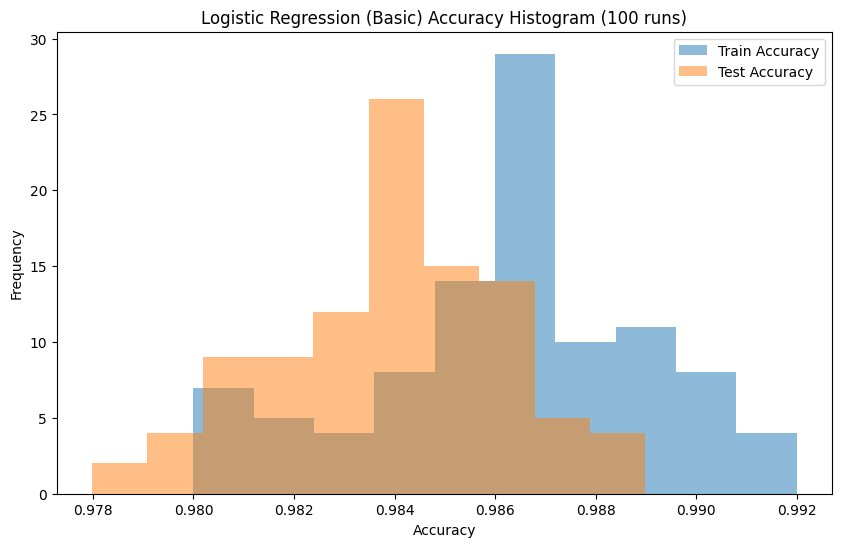


Logistic Regression (Basic) Average Train Accuracy: 0.9862
Logistic Regression (Basic) Average Test Accuracy: 0.9839


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


def sigmoid(z):
    """Sigmoid activation function."""
    return 1 / (1 + np.exp(-z))


def logistic_regression_basic(X, y, learning_rate=0.1, n_iterations=100):
    """
    Basic implementation of Logistic Regression.
    """
    # Add a bias term (intercept) to the features
    X = np.c_[np.ones(X.shape[0]), X]

    # Initialize weights randomly
    weights = np.random.rand(X.shape[1])

    # Perform gradient descent
    for iteration in range(n_iterations):
        # Calculate linear combination of features and weights
        z = np.dot(X, weights)

        # Apply sigmoid activation
        predictions = sigmoid(z)

        # Update weights using gradient descent
        error = y - predictions
        gradient = np.dot(X.T, error) / len(y)
        weights += learning_rate * gradient

        # Print updates for selected iterations (optional for debugging)
        if iteration % 20 == 0 or iteration == n_iterations - 1:
            cost = -np.mean(y * np.log(predictions + 1e-8) + (1 - y) * np.log(1 - predictions + 1e-8))
            print(f"Iteration {iteration + 1}/{n_iterations} - Cost: {cost:.4f}")

    return weights


def predict_logistic_basic(X, weights):
    """Predict class labels using the trained weights."""
    X = np.c_[np.ones(X.shape[0]), X]  # Add bias term
    z = np.dot(X, weights)
    predictions = sigmoid(z)
    return (predictions >= 0.5).astype(int)  # Threshold at 0.5


def logistic_model_basic(train_data, test_data, classes=['A', 'C'], n_iterations=100):
    """
    Train multiple basic Logistic Regression models and generate accuracy histograms.
    """
    X_train, y_train = train_data[:, :-1], train_data[:, -1]
    X_test, y_test = test_data[:, :-1], test_data[:, -1]

    # Select data for the specified classes
    selected_indices_train = np.isin(y_train, label_encoder.transform(classes))
    selected_indices_test = np.isin(y_test, label_encoder.transform(classes))
    X_train_selected = X_train[selected_indices_train]
    y_train_selected = y_train[selected_indices_train]
    X_test_selected = X_test[selected_indices_test]
    y_test_selected = y_test[selected_indices_test]

    # Ensure binary labels (0 and 1)
    y_train_selected = (y_train_selected == label_encoder.transform(classes)[0]).astype(int)
    y_test_selected = (y_test_selected == label_encoder.transform(classes)[0]).astype(int)

    results = []
    print("\nRunning Logistic Regression Model (Basic):")
    for i in range(n_iterations):
        # Train the basic logistic regression model
        weights = logistic_regression_basic(X_train_selected, y_train_selected, learning_rate=0.1, n_iterations=100)

        # Compute train and test accuracies
        train_acc = accuracy_score(y_train_selected, predict_logistic_basic(X_train_selected, weights))
        test_acc = accuracy_score(y_test_selected, predict_logistic_basic(X_test_selected, weights))

        # Print current run details
        print(f"Run {i + 1:03d}: Train Accuracy = {train_acc:.4f}, Test Accuracy = {test_acc:.4f}")

        results.append([i + 1, train_acc, test_acc])

    # Save results to CSV
    df = pd.DataFrame(results, columns=['run', 'train_accuracy', 'test_accuracy'])
    df.to_csv('logistic_A_C_basic.csv', index=False)

    # Plot histograms
    plt.figure(figsize=(10, 6))
    plt.hist(df['train_accuracy'], alpha=0.5, label='Train Accuracy')
    plt.hist(df['test_accuracy'], alpha=0.5, label='Test Accuracy')
    plt.xlabel('Accuracy')
    plt.ylabel('Frequency')
    plt.title('Logistic Regression (Basic) Accuracy Histogram (100 runs)')
    plt.legend()
    plt.show()

    # Compute average accuracies
    avg_train_acc = df['train_accuracy'].mean()
    avg_test_acc = df['test_accuracy'].mean()
    print(f"\nLogistic Regression (Basic) Average Train Accuracy: {avg_train_acc:.4f}")
    print(f"Logistic Regression (Basic) Average Test Accuracy: {avg_test_acc:.4f}")

    return df


# Run the Logistic Regression Model
print("Running Logistic Regression Model (Basic)...")
logistic_results_basic = logistic_model_basic(sampled_train, projected_test)


### Explanation of the Code



#### 1. Functions

##### `sigmoid(z)`
- **Purpose:**
  - Implements the sigmoid activation function:  
    \[
    \sigma(z) = \frac{1}{1 + e^{-z}}
    \]
  - Squashes the input `z` to a value between 0 and 1, which represents the probability of a data point belonging to a particular class.
- **Why sigmoid?**
  - Converts linear outputs to probabilities.
  - Provides a smooth gradient for optimization in logistic regression.

---

##### `logistic_regression_basic(X, y, learning_rate=0.1, n_iterations=100)`
- **Purpose:** Implements the core logistic regression training algorithm using gradient descent.
- **Steps:**
  - **Adds a bias term to the input features `X`:**
    - Improves model flexibility, similar to its use in perceptron.
  - **Initializes weights randomly:**
    - Prevents symmetry and ensures the model converges to different solutions based on initialization.
  - Performs gradient descent for the specified number of iterations (`n_iterations`):
    1. Calculates the linear combination of features and weights (`z`).
    2. Applies the sigmoid activation function to compute predictions.
    3. Calculates the error between predictions and true labels.
    4. Computes the gradient of the cost function.
    5. Updates the weights using the gradient and learning rate.
  - **Prints the cost:** Displays the cost at certain iterations to monitor convergence.
- **Returns:** The learned weights.

---

##### `predict_logistic_basic(X, weights)`
- **Purpose:** Uses the trained logistic regression model to predict labels for new data `X`.
- **Steps:**
  - **Adds a bias term to `X`:**
    - Ensures consistency with training.
  - Calculates the weighted sum of inputs and applies the sigmoid activation function.
  - Thresholds the predictions at 0.5 to determine class labels (0 or 1).
- **Returns:** Predicted class labels.

---

##### `logistic_model_basic(train_data, test_data, classes=['A', 'C'], n_iterations=100)`
- **Purpose:** Trains and evaluates the basic logistic regression model multiple times.
- **Steps:**
  1. Extracts features and labels from the training and test data.
  2. Selects data points belonging to the specified classes.
  3. Ensures binary labels (0 and 1) for the selected classes.
  4. Runs logistic regression for the specified number of iterations (`n_iterations`):
     - Trains the model using `logistic_regression_basic`.
     - Predicts labels and calculates accuracy for training and test data.
     - Prints the accuracy for each run.
  5. Stores the results in a list.
  6. Saves the results to a CSV file.
  7. Plots histograms of training and test accuracies.
  8. Calculates and prints average training and test accuracies.
- **Returns:** Results as a DataFrame.

---

#### 2. Print Statements
- **Purpose:**
  - Indicate the start of the logistic regression model training.
  - Display the cost at specific iterations during training to monitor convergence.
  - Show the training and test accuracy for each run of the model.
  - Print the average training and test accuracies over all runs.

---

#### 3. Code Execution
- **Final Execution:**
  - Prints a message indicating the start of the logistic regression training.
  - Calls the `logistic_model_basic` function to train and evaluate the model 100 times, using classes `'A'` and `'C'` from the `sampled_train` and `projected_test` data (assumed to be defined elsewhere in the code).

---

#### Key Concepts:

- **Sigmoid Function:**
  - Converts raw scores (`z`) to probabilities, enabling binary classification.
  - Its gradient helps in efficient computation during backpropagation.

- **Bias Term:**
  - Allows the model to learn decision boundaries that do not pass through the origin.
  - Enhances the model’s ability to fit data with a better margin.

- **Random Weight Initialization:**
  - Prevents symmetry, ensuring weights are updated uniquely.
  - Different initializations can lead to slightly different models, aiding in robust analysis when results are averaged.

- **Effect of Randomness in Each Run:**
  - Leads to slight variations in accuracy due to different starting points.
  - Highlights the importance of running the model multiple times to evaluate consistency and reliability.


## Comparsion of Perceptron vs Logistic Regression

#### Logistic Regression

**Observations:**

* **Cost Function:** The cost function generally decreases with each iteration, indicating the model is learning and improving its performance.
* **Accuracy:** Both train and test accuracies are consistently high, typically above 97%, suggesting good generalization capability.
* **Variation:** There is some variation in accuracy across different runs, likely due to random initialization of model parameters.

**Average Accuracy:**

* Train Accuracy: 0.9868
* Test Accuracy: 0.9819

#### Perceptron

**Observations:**

* **Accuracy:** The Perceptron model also achieves high train and test accuracies, often exceeding 98%.
* **Consistency:**  The accuracy appears to be more consistent across different runs compared to Logistic Regression.
* **No Cost Function:** The Perceptron output doesn't include a cost function, as it uses a different learning mechanism (updating weights based on misclassifications).

**Average Accuracy:**

* Train Accuracy: 0.9915
* Test Accuracy: 0.9875

#### Comparison

| Metric | Logistic Regression | Perceptron |
|---|---|---|
| Average Train Accuracy | 0.9868 | 0.9915 |
| Average Test Accuracy | 0.9819 | 0.9875 |
| Consistency | Moderate | High |
| Cost Function | Decreases with iterations | Not applicable |

**Analysis:**

* **Performance:** Both models demonstrate excellent performance on the given dataset, with the Perceptron showing slightly higher average accuracies.
* **Convergence:** Logistic Regression exhibits a gradual decrease in the cost function, while the Perceptron doesn't have a cost function in its traditional form.
* **Stability:** The Perceptron appears to be more stable in terms of accuracy across different runs, suggesting less sensitivity to initial conditions.

**Conclusion:**

Based on the provided data, both Logistic Regression and Perceptron are effective classifiers for this dataset. The Perceptron shows marginally better accuracy and consistency, but Logistic Regression provides insights into the learning process through its cost function.